Mount the Drive

We would like to acknowledging Gemini and ChatGPT for parts of the code

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).





#Problem A

Read in and Process Data from CSV Files

In [ ]:
import pandas as pd

demo_1 = pd.read_csv('/content/drive/MyDrive/ECEN524/Project 1/Kinesthetic_teaching_take_1.csv')
demo_2 = pd.read_csv('/content/drive/MyDrive/ECEN524/Project 1/Kinesthetic_teaching_take_2.csv')
demo_3 = pd.read_csv('/content/drive/MyDrive/ECEN524/Project 1/Kinesthetic_teaching_take_3.csv')
demo_4 = pd.read_csv('/content/drive/MyDrive/ECEN524/Project 1/Kinesthetic_teaching_take_4.csv')
demo_5 = pd.read_csv('/content/drive/MyDrive/ECEN524/Project 1/Kinesthetic_teaching_take_5.csv')

demos = [demo_1, demo_2, demo_3, demo_4, demo_5]
indexes = ['Time', 'EE Position x', 'EE Position y', 'EE Position z', 'EE Orientation x', 'EE Orientation y', 'EE Orientation z', 'EE Orientation w', 'Left Finger Position', 'Right Finger Position 2']

In [ ]:
# Pre process data to align important aspects of the demonstration
def pre_process(demos, indexes):
  time_f = []
  x_pos_f = []
  y_pos_f = []
  z_pos_f = []
  x_rot_f = []
  y_rot_f = []
  z_rot_f = []
  w_rot_f = []
  left_finger_pos_f = []
  right_finger_pos_f = []

  for demo in demos:
    end = len(demo[indexes[0]])-1
    init_val = demo[indexes[1]][0]
    final_val = demo[indexes[1]][end]
    for i in range(end+1):
      if abs(demo[indexes[1]][i] - init_val) > 0.001:
        start_time = demo[indexes[0]][i] - 6
        break
    for i in range(end+1):
      if abs(demo[indexes[1]][end-i] - final_val) > 0.001:
        end_time = demo[indexes[0]][end-i] + 2
        break

    time = []
    x_pos = []
    y_pos = []
    z_pos = []
    x_rot = []
    y_rot = []
    z_rot = []
    w_rot = []
    left_finger_pos = []
    right_finger_pos = []

    for i in range(end+1):
      if demo[indexes[0]][i] >= start_time and demo[indexes[0]][i] <= end_time:
        time.append(demo[indexes[0]][i])
        x_pos.append(demo[indexes[1]][i])
        y_pos.append(demo[indexes[2]][i])
        z_pos.append(demo[indexes[3]][i])
        x_rot.append(demo[indexes[4]][i])
        y_rot.append(demo[indexes[5]][i])
        z_rot.append(demo[indexes[6]][i])
        w_rot.append(demo[indexes[7]][i])
        left_finger_pos.append(demo[indexes[8]][i])
        right_finger_pos.append(demo[indexes[9]][i])

    time_f.append(time)
    x_pos_f.append(x_pos)
    y_pos_f.append(y_pos)
    z_pos_f.append(z_pos)
    x_rot_f.append(x_rot)
    y_rot_f.append(y_rot)
    z_rot_f.append(z_rot)
    w_rot_f.append(w_rot)
    left_finger_pos_f.append(left_finger_pos)
    right_finger_pos_f.append(right_finger_pos)

  return time_f, x_pos_f, y_pos_f, z_pos_f, x_rot_f, y_rot_f, z_rot_f, w_rot_f, left_finger_pos_f, right_finger_pos_f

In [ ]:
# Normalize Times
time, x_pos, y_pos, z_pos, x_rot, y_rot, z_rot, w_rot, left_finger_pos, right_finger_pos = pre_process(demos, indexes)

for i in range(5):
  time[i] = time[i] - time[i][0]

Plot the Data

In [ ]:
import matplotlib.pyplot as plt

def plotter(time, data, title, xlabel, ylabel):
  for i in range(5):
    plt.plot(time[i], data[i], label=f'Demo {i+1}')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()

In [ ]:
def big_plotter(data, aligned=False):
  fig = plt.figure(figsize=(21,21))
  ylabels = ['Position (meters)', 'Position (meters)', 'Position (meters)', 'Orientation (radians)', 'Orientation (radians)', 'Orientation (radians)', 'Orientation (radians)', 'Position (meters)', 'Position (meters)']

  for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    if (aligned):
      plotter(data[0], data[i+1], f'{indexes[i+1]} Across All Demonstrations (Aligned with DTW)', 'Time (sec)', ylabels[i])
    else:
      plotter(data[0], data[i+1], f'{indexes[i+1]} Across All Demonstrations', 'Time (sec)', ylabels[i])
  plt.show()

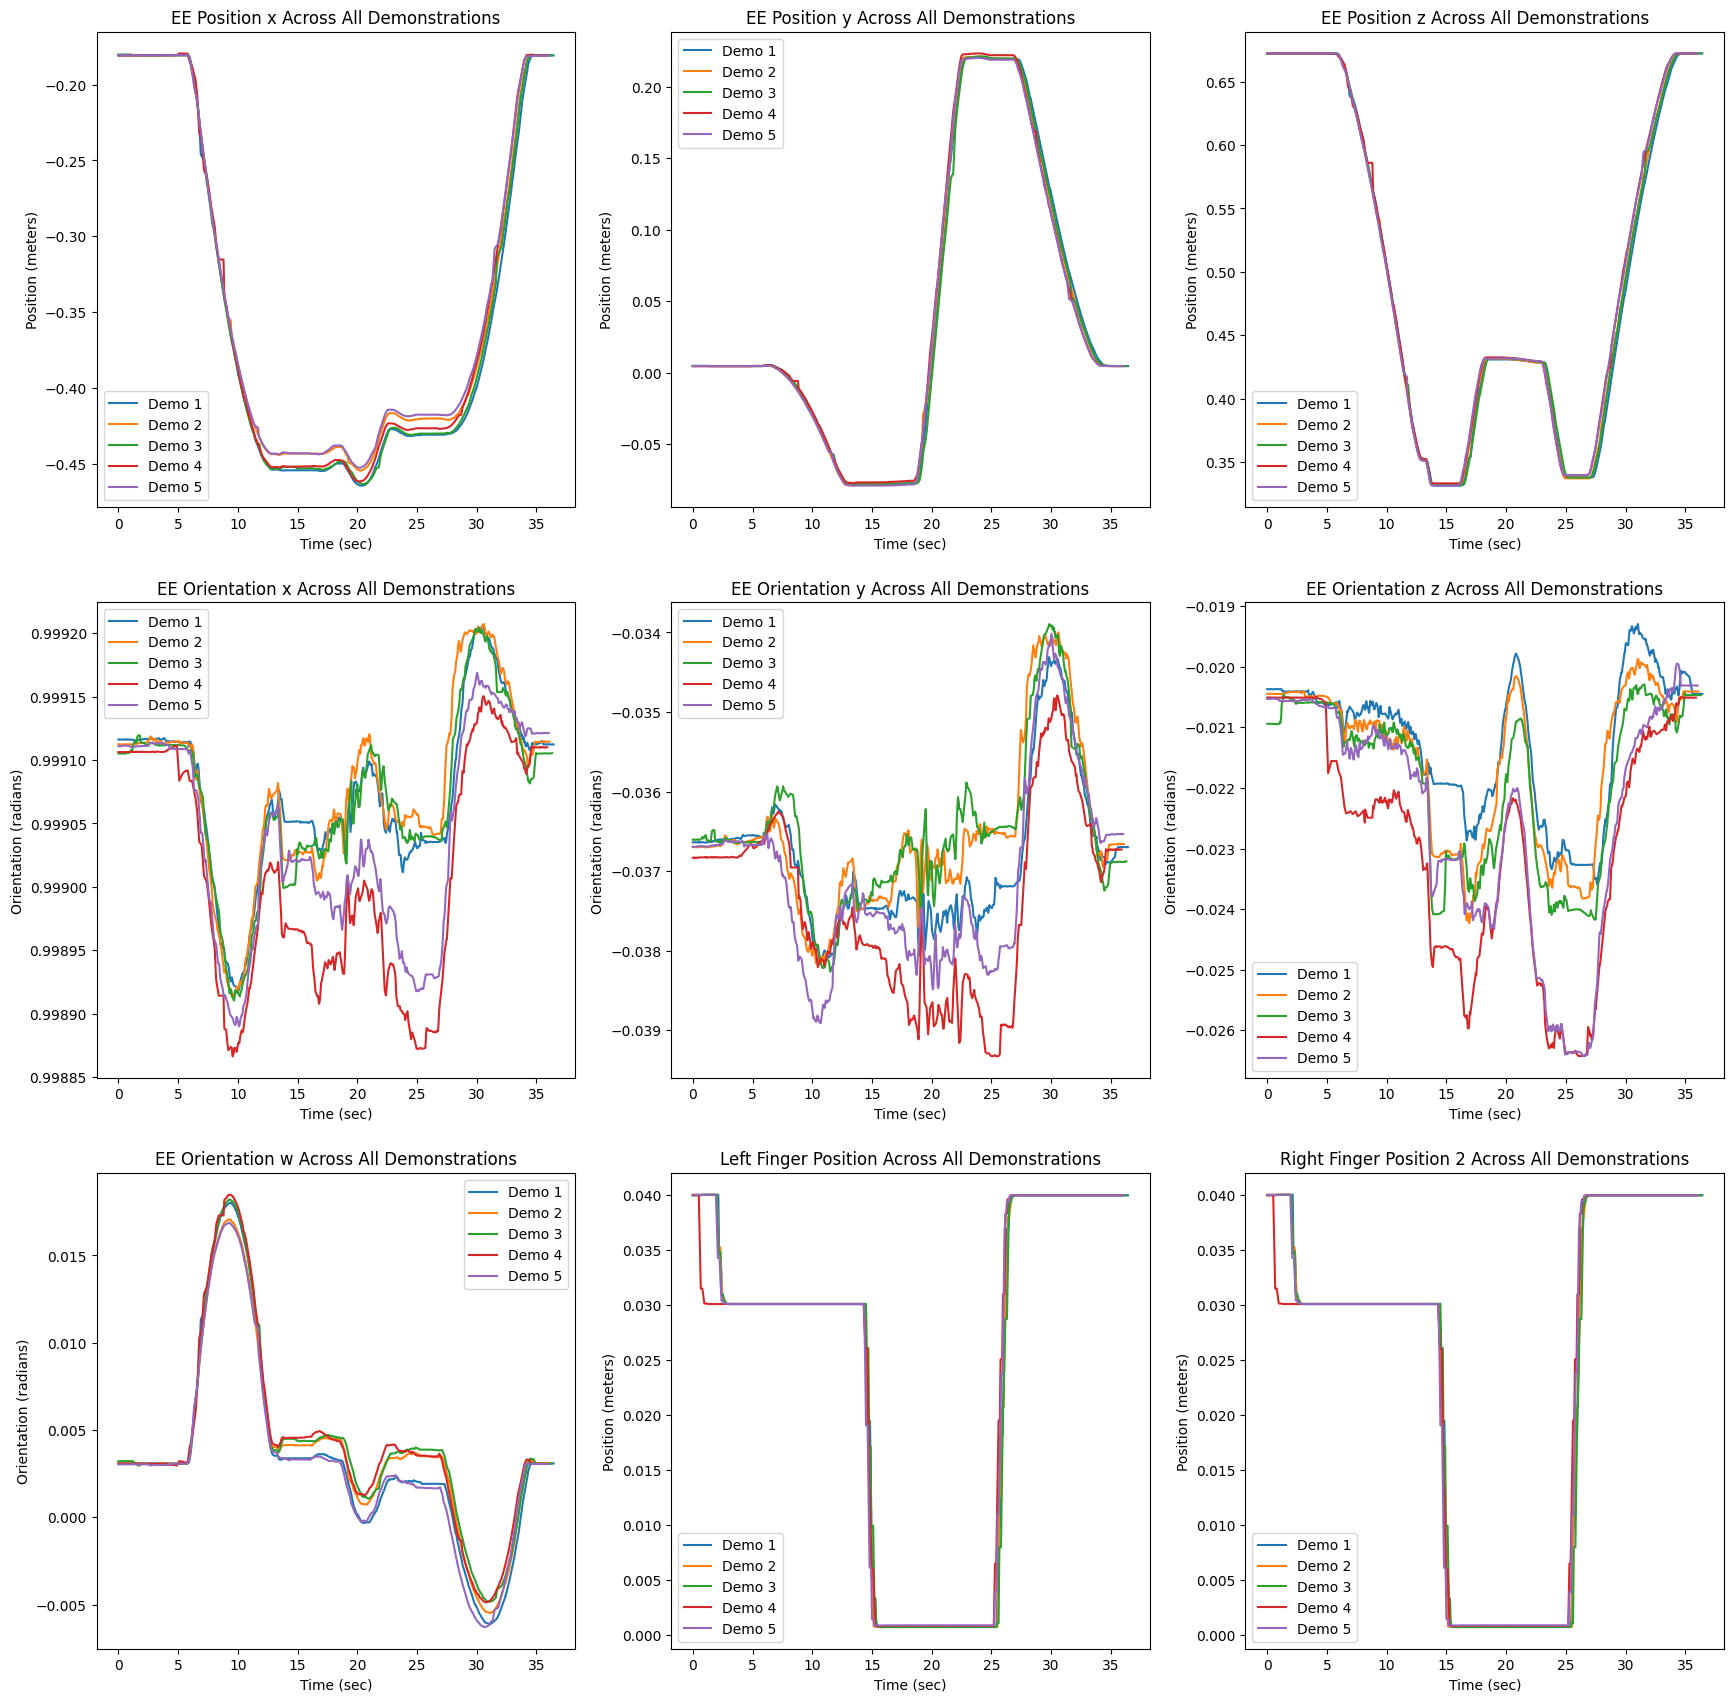

In [ ]:
Data = [time, x_pos, y_pos, z_pos, x_rot, y_rot, z_rot, w_rot, left_finger_pos, right_finger_pos]
big_plotter(Data)

#Problem 2
##Part 1

Perform DTW on 2 Demonstrations

In [ ]:
!pip install dtw-python

In [ ]:
from dtw import dtw
import numpy as np

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



/usr/local/lib/python3.11/dist-packages/dtw/stepPattern.py:341: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")


<Axes: xlabel='Query index', ylabel='Reference index'>

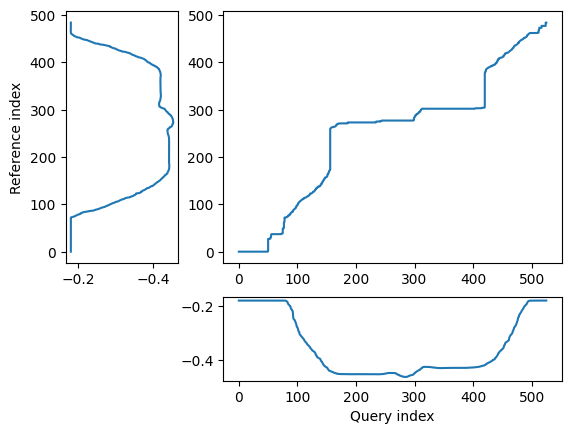

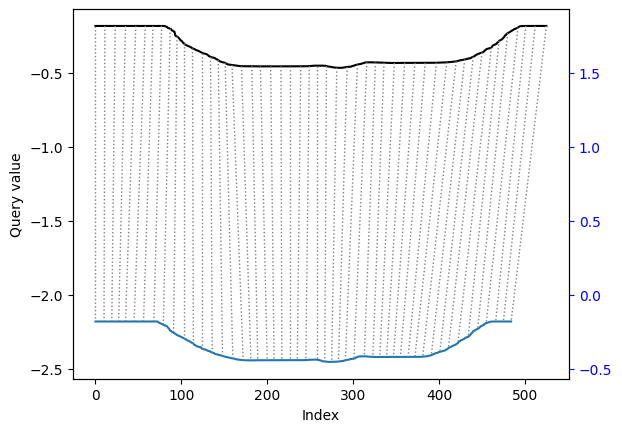

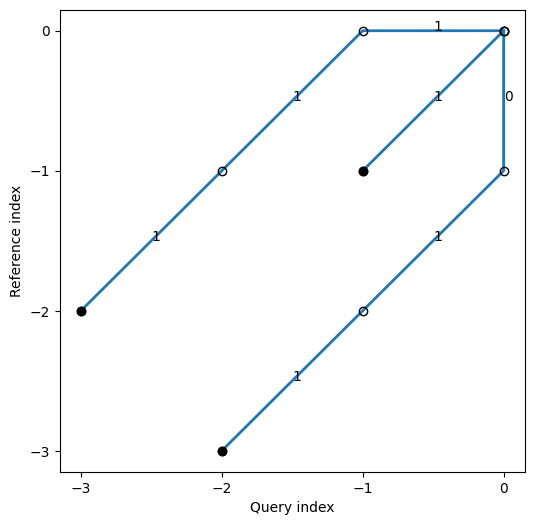

In [ ]:

import numpy as np

## A noisy sine wave as query
#idx = np.linspace(0,6.28,num=100)
#query = np.sin(idx) + np.random.uniform(size=100)/10.0
query = np.array(x_pos[0])

## A cosine is for template; sin and cos are offset by 25 samples
#template = np.cos(idx)
template = np.array(x_pos[1])

## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True,
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()

## And much more!

Calculate and Display the Cost of Performing DTW on Every Possible Demonstration Pair

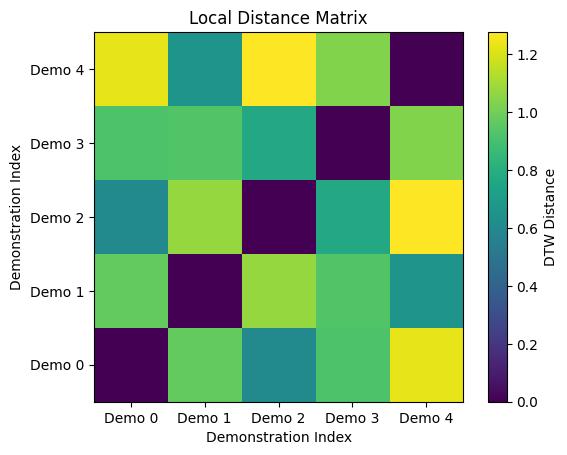

In [ ]:
import numpy as np
from dtw import *
import matplotlib.pyplot as plt

# Step 1: Store the 5 demonstrations (trajectories) in a list
# Replace x_pos[i] with your actual trajectories
demonstrations = [np.array(x_pos[i]) for i in range(5)]

# Step 2: Define a function to compute DTW distance between two trajectories
def dtw_distance(traj1, traj2):
    alignment = dtw(traj1, traj2, keep_internals=True)
    return alignment.distance

# Step 3: Compute the pairwise DTW distance matrix manually
num_demos = len(demonstrations)
distance_matrix = np.zeros((num_demos, num_demos))

for i in range(num_demos):
    for j in range(num_demos):
        distance_matrix[4-i, j] = dtw_distance(demonstrations[i], demonstrations[j])
# Step 4: Plot the distance matrix with corrected orientation
plt.imshow(distance_matrix, cmap='viridis', interpolation='nearest', origin='upper')
plt.colorbar(label='DTW Distance')
plt.title('Local Distance Matrix')
plt.xlabel('Demonstration Index')
plt.ylabel('Demonstration Index')
plt.xticks(range(num_demos), labels=[f"Demo {i}" for i in range(num_demos)])
plt.yticks(range(num_demos), labels=[f"Demo {4-i}" for i in range(num_demos)])
# plt.gca().invert_yaxis()  # Invert the Y-axis so Demo 0 starts from the top
plt.show()


Alignment between Demo 0 and Demo 1:
Alignment between Demo 0 and Demo 2:
Alignment between Demo 0 and Demo 3:
Alignment between Demo 0 and Demo 4:
Alignment between Demo 1 and Demo 2:
Alignment between Demo 1 and Demo 3:
Alignment between Demo 1 and Demo 4:
Alignment between Demo 2 and Demo 3:
Alignment between Demo 2 and Demo 4:
Alignment between Demo 3 and Demo 4:


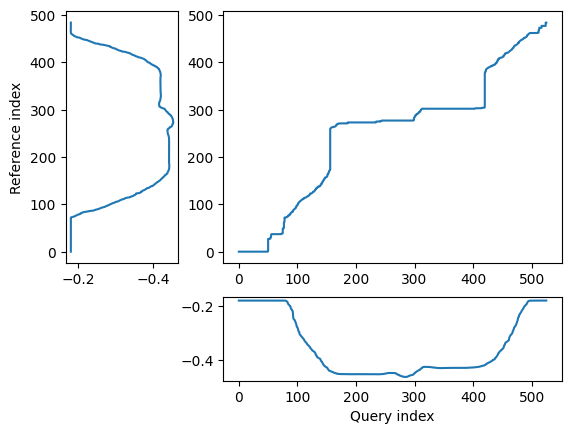

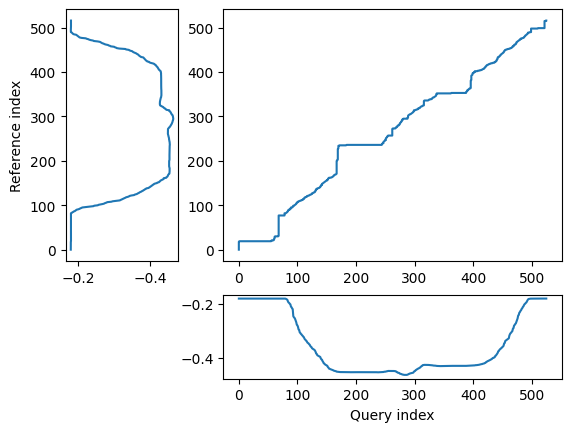

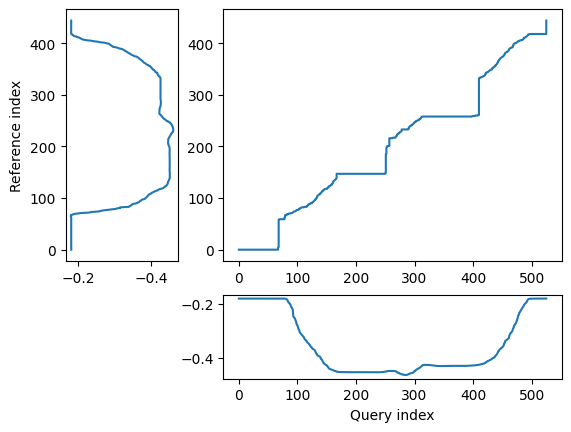

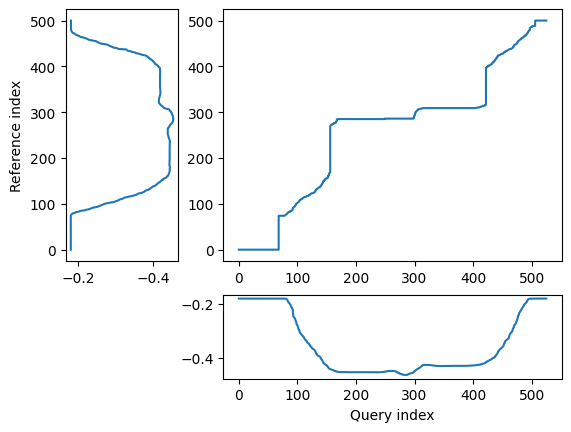

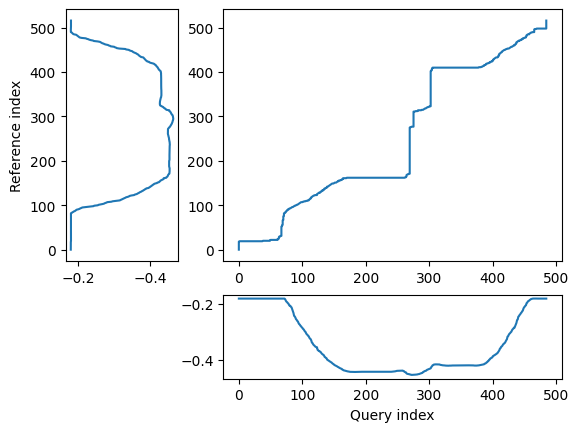

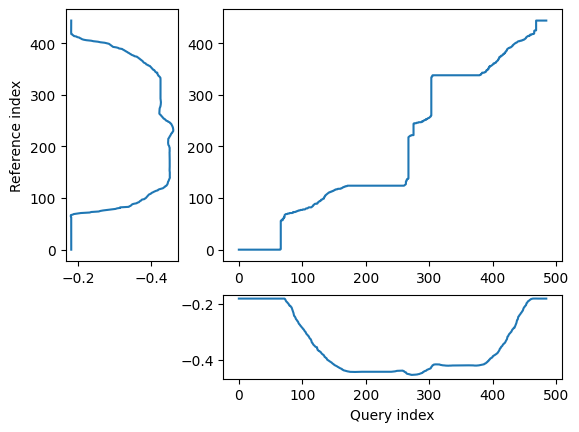

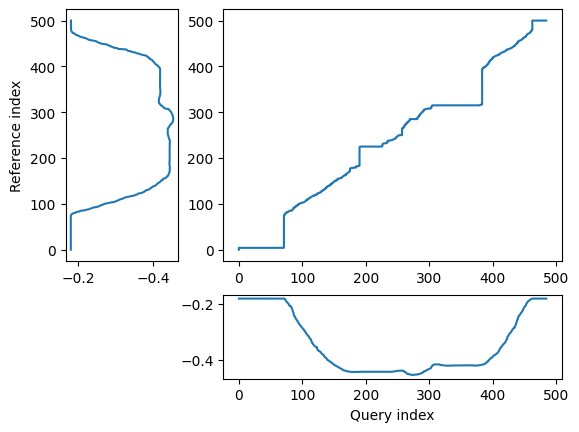

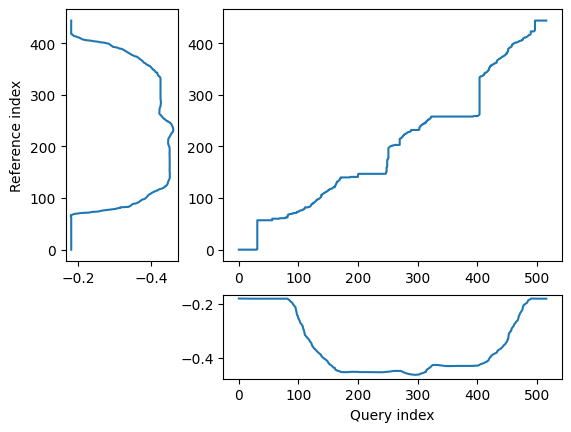

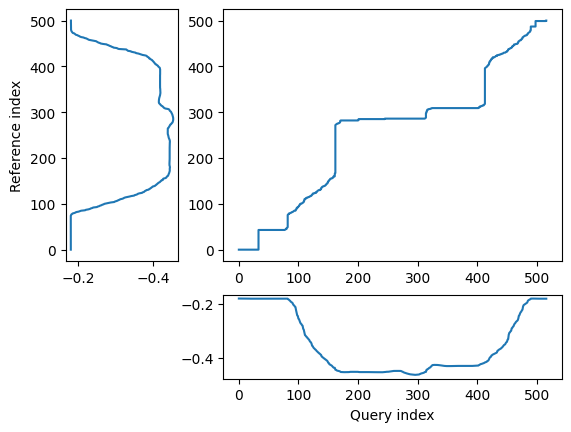

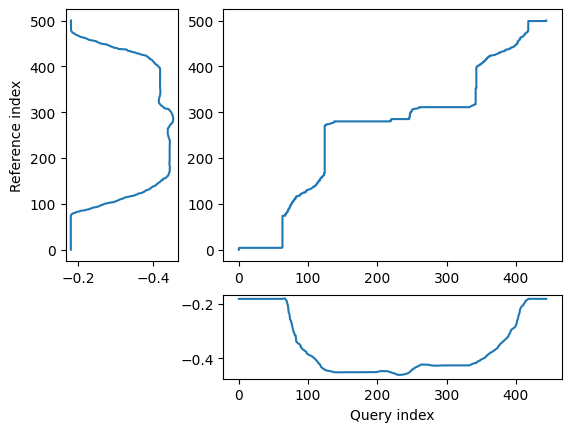

In [ ]:
# Visualize pairwise alignments
for i in range(num_demos):
    for j in range(i+1, num_demos):  # Avoid duplicate and self-pairs
        alignment = dtw(demonstrations[i], demonstrations[j], keep_internals=True)

        # Plot the warping curve (alignment curve)
        print(f"Alignment between Demo {i} and Demo {j}:")
        alignment.plot(type="threeway")


#Problem B
##Part 2
Perform DTW on All Demonstrations

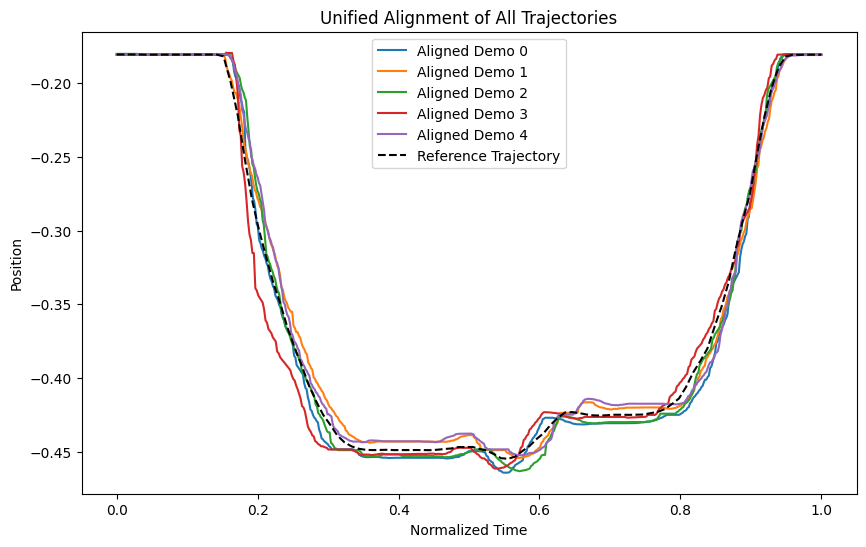

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Compute an average trajectory as the reference
ref_trajectory = np.mean(
    [np.interp(np.linspace(0, len(demo) - 1, num=100), np.arange(len(demo)), demo) for demo in demonstrations],
    axis=0
)

# Step 2: Align all trajectories to the reference trajectory
aligned_trajectories = []
for demo in demonstrations:
    alignment = dtw(ref_trajectory, demo, keep_internals=True)

    # Warp the trajectory using the alignment path
    aligned_demo = np.array([demo[idx] for idx in alignment.index2])
    aligned_trajectories.append(aligned_demo)

# Step 3: Plot the unified alignment
plt.figure(figsize=(10, 6))
for i, aligned_demo in enumerate(aligned_trajectories):
    plt.plot(np.linspace(0, 1, len(aligned_demo)), aligned_demo, label=f"Aligned Demo {i}")

plt.plot(np.linspace(0, 1, len(ref_trajectory)), ref_trajectory, color='black', linestyle='--', label="Reference Trajectory")
plt.title("Unified Alignment of All Trajectories")
plt.xlabel("Normalized Time")
plt.ylabel("Position")
plt.legend()
plt.show()


In [ ]:
import numpy as np

def downsample_signal(signal, target_length):
    """
    Downsamples a trajectory (signal) to a fixed length while preserving shape.

    Args:
        signal (list or np.array): The input trajectory.
        target_length (int): The desired fixed length.

    Returns:
        np.array: The downsampled trajectory.
    """
    original_length = len(signal)

    # Create new equally spaced index positions for downsampling
    new_indices = np.linspace(0, original_length - 1, target_length)

    # Interpolate to fit the new fixed length
    downsampled_signal = np.interp(new_indices, np.arange(original_length), signal)

    return downsampled_signal


In [ ]:
import numpy as np
from dtw import *
import matplotlib.pyplot as plt

def multi_alignment(distance_matrix, data, target_len):
  # Initialize variables
  min_distance = np.inf
  used_demos = []

  # Find the most similar pair to start alignment
  for i in range(5):
      for j in range(5):
          if distance_matrix[i][j] != 0:
              if distance_matrix[i][j] < min_distance:
                  min_distance = distance_matrix[i][j]
                  demo_a = i
                  demo_b = j

  # print(min_distance)
  print(f'Performing DTW on demos {demo_a+1} and {demo_b+1}:')
  used_demos.append(demo_a)
  used_demos.append(demo_b)

  # Align the first pair
  print("Number of samples prior to performing DTW and down sampling:")
  print(f'Demo {demo_a+1}: {len(data[demo_a])}')
  print(f'Demo {demo_b+1}: {len(data[demo_b])}')
  demonstrations = dtw(data[demo_a], data[demo_b], keep_internals=True)
  demonstrations.plot(type="twoway", offset=-2)

  if target_len == -1:
    target_len = len(demonstrations.index1)
    final_indeces = [np.zeros(len(demonstrations.index1)) for i in range(5)]
    final_data = [np.zeros(len(demonstrations.index1)) for i in range(5)]

    final_indeces[demo_a] = demonstrations.index1
    final_indeces[demo_b] = demonstrations.index2

    # Store the warped trajectories
    final_data[demo_a] = [data[demo_a][i] for i in demonstrations.index1]
    final_data[demo_b] = [data[demo_b][i] for i in demonstrations.index2]
  else:
    final_indeces = [np.zeros(target_len) for i in range(5)]
    final_data = [np.zeros(target_len) for i in range(5)]

    downsampled_index_a = downsample_signal(demonstrations.index1, target_len).astype(int)
    final_indeces[demo_a] = downsampled_index_a
    downsampled_data_a = [data[demo_a][i] for i in final_indeces[demo_a]]
    final_data[demo_a] = downsampled_data_a

    downsampled_index_b = downsample_signal(demonstrations.index2, target_len).astype(int)
    final_indeces[demo_b] = downsampled_index_b
    downsampled_data_b = [data[demo_b][i] for i in final_indeces[demo_b]]
    final_data[demo_b] = downsampled_data_b

  print("Number of samples after performing DTW and down sampling:")
  print(f'Demo {demo_a+1}: {len(final_data[demo_a])}')
  print(f'Demo {demo_b+1}: {len(final_data[demo_b])}')
  print()

  # Continue aligning the rest of the trajectories
  while len(used_demos) < 5:
      min_distance = np.inf
      for i in range(5):
          for j in range(5):
              if (i not in used_demos and j in used_demos) or (i in used_demos and j not in used_demos):
                  if distance_matrix[i][j] != 0:
                      if distance_matrix[i][j] < min_distance:
                          min_distance = distance_matrix[i][j]
                          demo_a = i
                          demo_b = j

      print(f'Performing DTW on demos {demo_a+1} and {demo_b+1}:')

      # Identify which trajectory is new
      if demo_a not in used_demos:
          flag = 1
          used_demos.append(demo_a)
          data_a = data[demo_a]
          data_b = final_data[demo_b]
      else:
          flag = 0
          used_demos.append(demo_b)
          data_a = final_data[demo_a]
          data_b = data[demo_b]

      # Align the new trajectory with the current aligned data
      print("Number of samples prior to performing DTW and down sampling:")
      print(f'Demo {demo_a+1}: {len(data_a)}')
      print(f'Demo {demo_b+1}: {len(data_b)}')
      demonstrations = dtw(data_a, data_b, keep_internals=True)
      demonstrations.plot(type="twoway", offset=-2)

      if flag == 1:
          downsampled_index = downsample_signal(demonstrations.index1, target_len).astype(int)
          final_indeces[demo_a] = downsampled_index
          downsampled_data = [data_a[i] for i in final_indeces[demo_a]]
          final_data[demo_a] = downsampled_data
      else:
          downsampled_index = downsample_signal(demonstrations.index2, target_len).astype(int)
          final_indeces[demo_b] = downsampled_index
          downsampled_data = [data_b[i] for i in final_indeces[demo_b]]
          final_data[demo_b] = downsampled_data

      print("Number of samples after performing DTW down sampling:")
      print(f'Demo {demo_a+1}: {len(final_data[demo_a])}')
      print(f'Demo {demo_b+1}: {len(final_data[demo_b])}')
      print()


  print("Final sample numbers of aligned data:")
  for i in range(5):
    print(f'Demo {i}: {len(final_data[i])}')

  return final_indeces, final_data

Performing DTW on demos 3 and 1:
Number of samples prior to performing DTW and down sampling:
Demo 3: 517
Demo 1: 526
Number of samples after performing DTW and down sampling:
Demo 3: 846
Demo 1: 846

Performing DTW on demos 5 and 3:
Number of samples prior to performing DTW and down sampling:
Demo 5: 501
Demo 3: 846
Number of samples after performing DTW down sampling:
Demo 5: 846
Demo 3: 846

Performing DTW on demos 1 and 2:
Number of samples prior to performing DTW and down sampling:
Demo 1: 846
Demo 2: 485
Number of samples after performing DTW down sampling:
Demo 1: 846
Demo 2: 846

Performing DTW on demos 4 and 5:
Number of samples prior to performing DTW and down sampling:
Demo 4: 445
Demo 5: 846
Number of samples after performing DTW down sampling:
Demo 4: 846
Demo 5: 846

Final sample numbers of aligned data:
Demo 0: 846
Demo 1: 846
Demo 2: 846
Demo 3: 846
Demo 4: 846


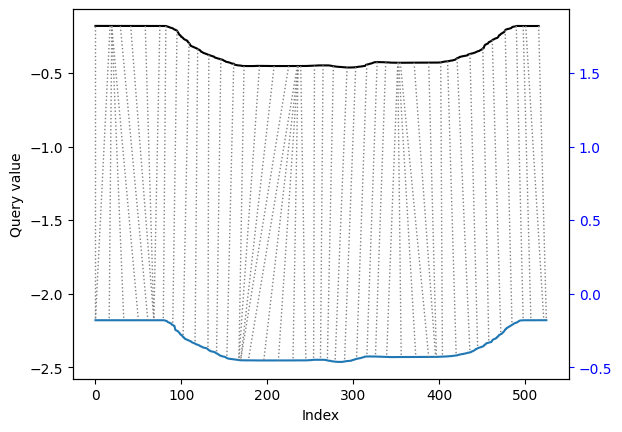

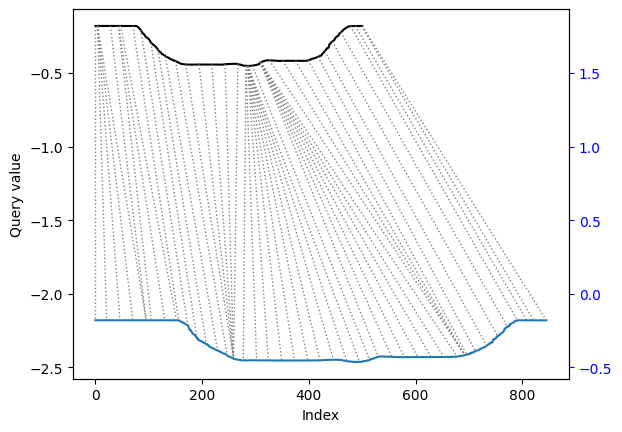

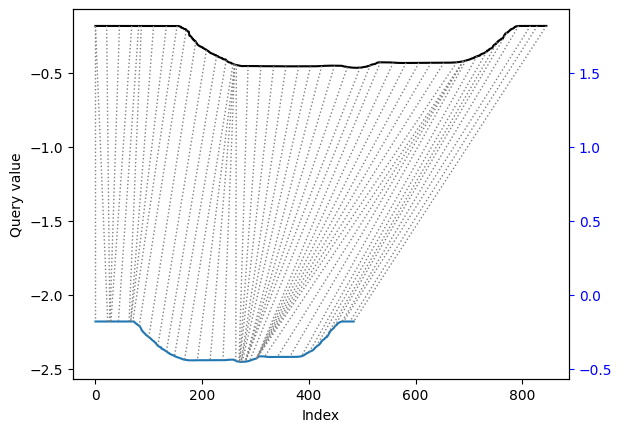

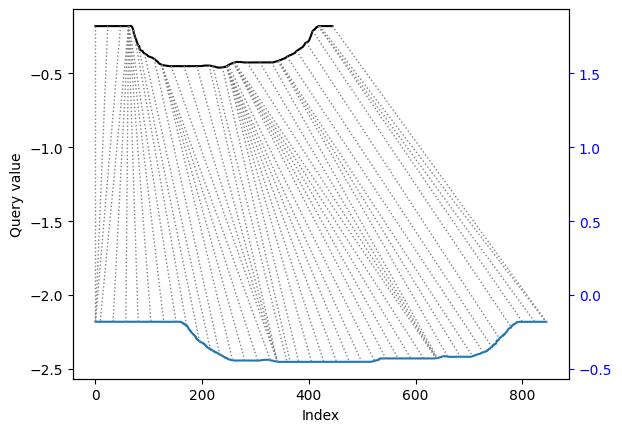

In [ ]:
final_indeces, final_x_pos = multi_alignment(distance_matrix, x_pos, -1)
target_len = len(final_indeces[0])

final_time = []
final_y_pos = []
final_z_pos = []
final_x_rot = []
final_y_rot = []
final_z_rot = []
final_w_rot = []
final_left_finger_pos = []
final_right_finger_pos = []

for i in range(5):
    final_time.append([time[i][j] for j in final_indeces[i]])
    final_y_pos.append([y_pos[i][j] for j in final_indeces[i]])
    final_z_pos.append([z_pos[i][j] for j in final_indeces[i]])
    final_x_rot.append([x_rot[i][j] for j in final_indeces[i]])
    final_y_rot.append([y_rot[i][j] for j in final_indeces[i]])
    final_z_rot.append([z_rot[i][j] for j in final_indeces[i]])
    final_w_rot.append([w_rot[i][j] for j in final_indeces[i]])
    final_left_finger_pos.append([left_finger_pos[i][j] for j in final_indeces[i]])
    final_right_finger_pos.append([right_finger_pos[i][j] for j in final_indeces[i]])

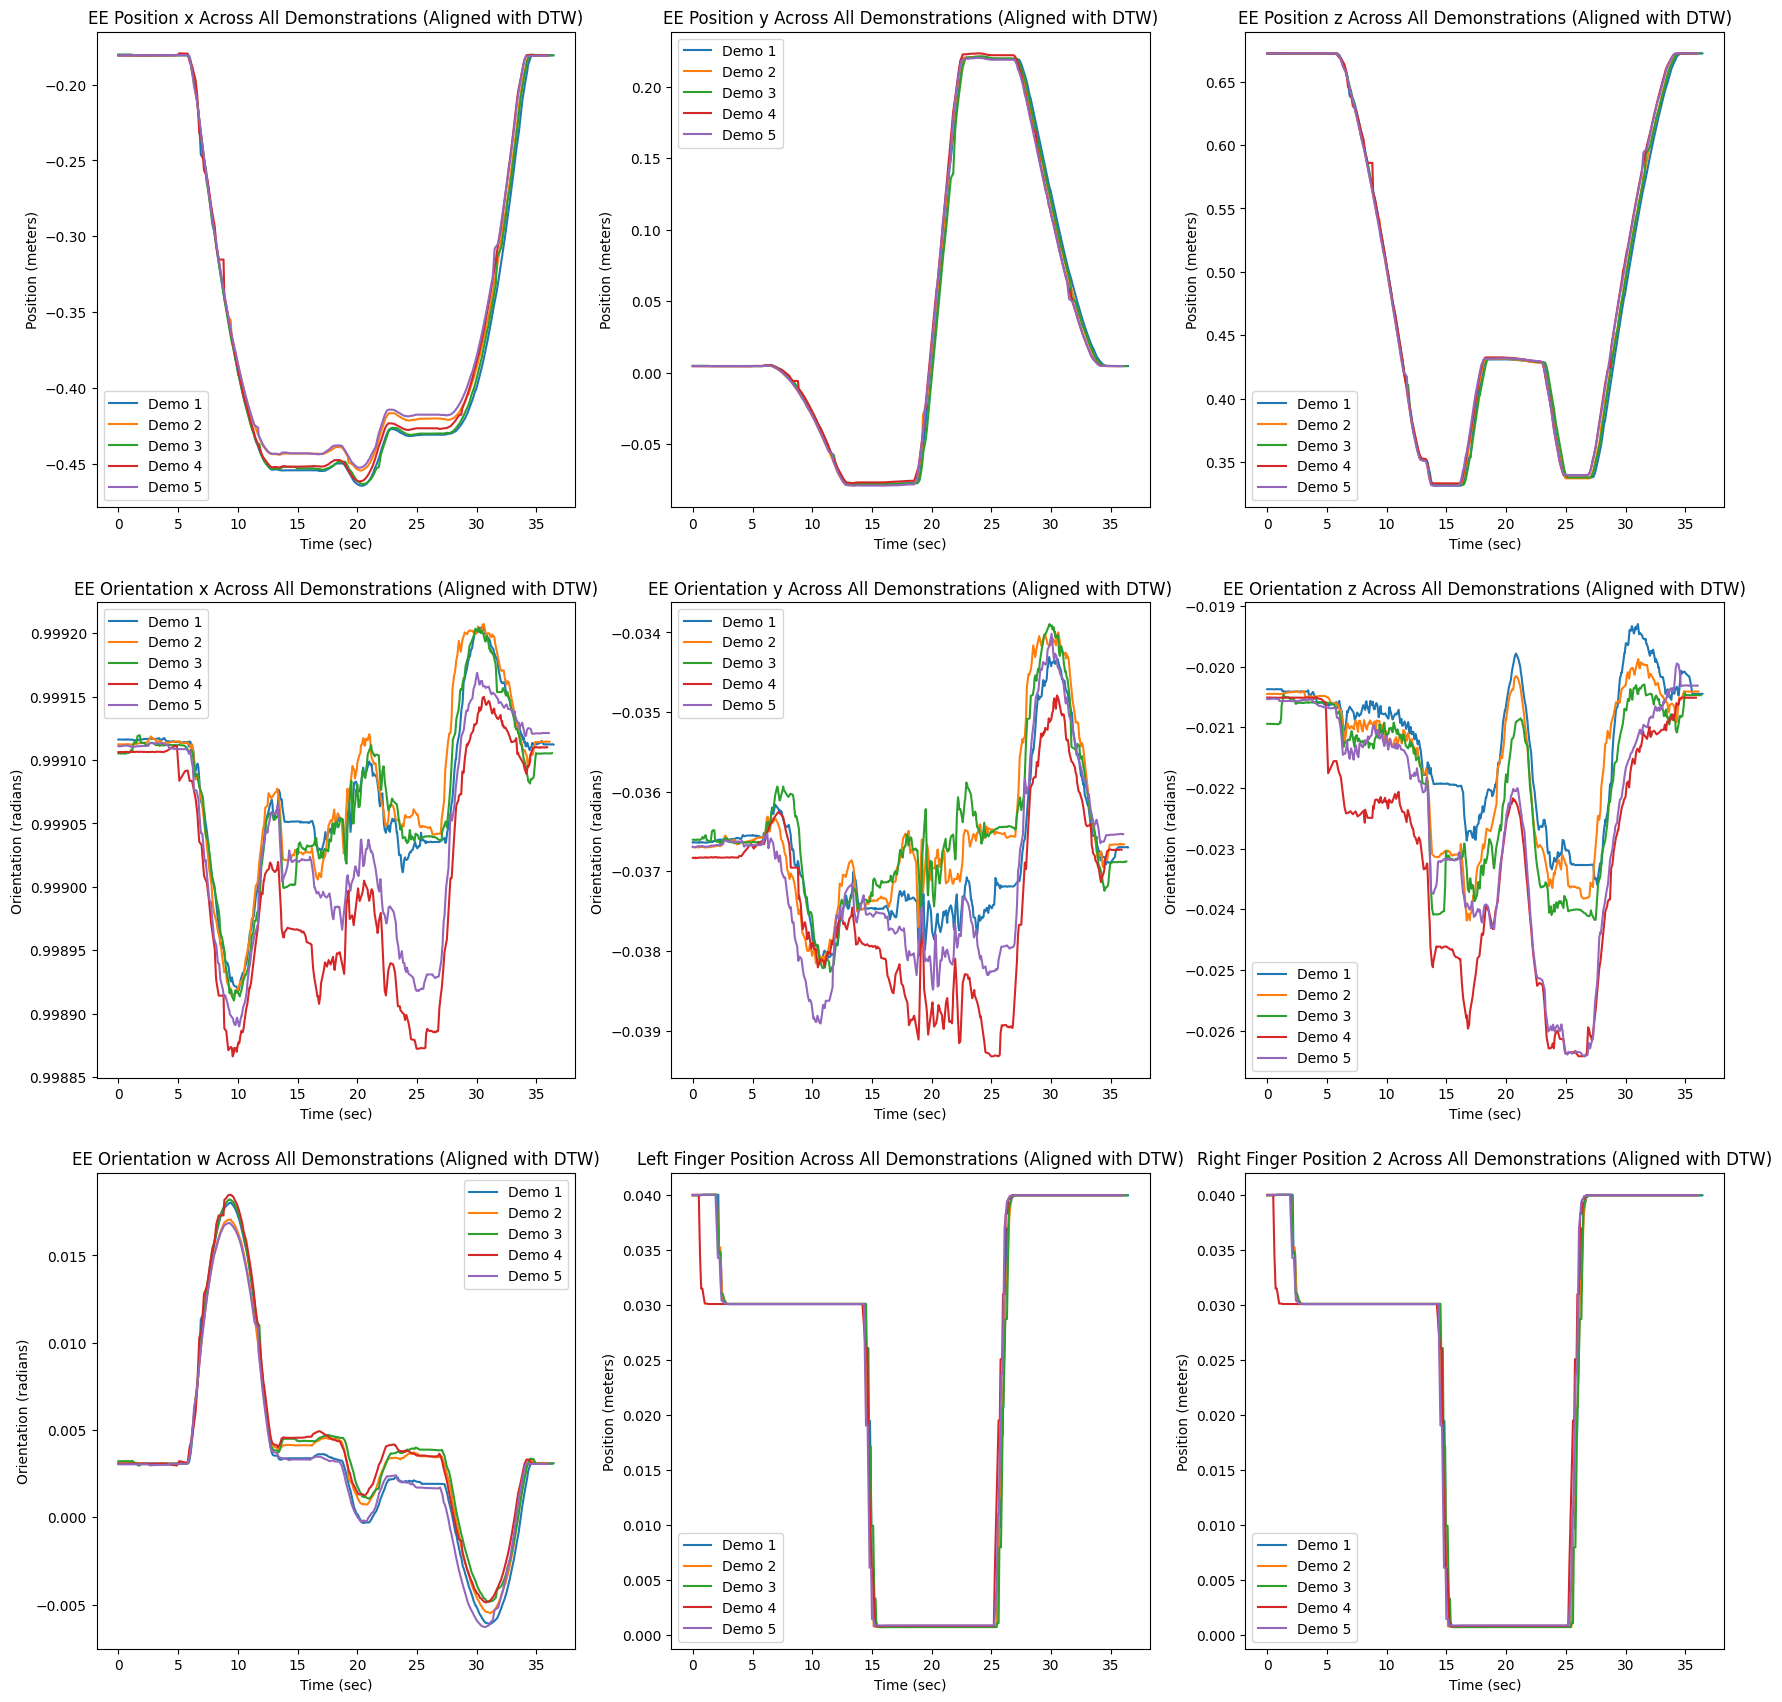

In [ ]:
Data = [final_time, final_x_pos, final_y_pos, final_z_pos, final_x_rot, final_y_rot, final_z_rot, final_w_rot, final_left_finger_pos, final_right_finger_pos]
big_plotter(Data, aligned=True)

#Problem C
##Part A
Perform GMM/GMR on Aligned Demonstrations

In [ ]:
#import requred libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from scipy.stats import norm
import warnings
import random

warnings.filterwarnings('ignore')

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
import numpy as np

D = [final_time, final_x_pos, final_y_pos, final_z_pos, final_x_rot, final_y_rot, final_z_rot, final_w_rot, final_left_finger_pos, final_right_finger_pos]

# Determine the number of rows and columns
num_rows = len(D)  # Number of demonstrations
num_cols = len(D[0][0]) * len(D[0])  # Total data points across all dimensions

# Initialize the array
X = np.empty((num_rows, num_cols))

# Populate the array
for i in range(num_rows):
    row_data = []
    for j in range(len(D[0])):
        row_data.extend(D[i][j])  # Extend with data from each dimension
    X[i] = row_data

# Print the shape to verify
print(X.shape)

(10, 4230)


In [ ]:
!git clone https://github.com/BatyaGG/Gaussian-Mixture-Models.git

fatal: destination path 'Gaussian-Mixture-Models' already exists and is not an empty directory.


In [ ]:
%cd /content/Gaussian-Mixture-Models

/content/Gaussian-Mixture-Models


In [ ]:
!python3 -m lib2to3 -w /content/Gaussian-Mixture-Models/GMM_GMR.py

RefactoringTool: Skipping optional fixer: buffer
RefactoringTool: Skipping optional fixer: idioms
RefactoringTool: Skipping optional fixer: set_literal
RefactoringTool: Skipping optional fixer: ws_comma
RefactoringTool: No changes to /content/Gaussian-Mixture-Models/GMM_GMR.py
RefactoringTool: Files that need to be modified:
RefactoringTool: /content/Gaussian-Mixture-Models/GMM_GMR.py


In [ ]:
import sys
sys.path.append('/content/Gaussian-Mixture-Models')  # Adds the repo to the Python path

from GMM_GMR import GMM_GMR  # Replace with actual file/module

In [ ]:
X_ = np.array([X[0], X[1], X[2], X[3], X[7], X[8], X[9]])
X_rot = np.array([X[0], X[4], X[5], X[6]])

In [ ]:
len_start_to_pick = 382
len_pick_to_place = 252
len_place_to_end = 212

X_start_to_pick = []
X_pick_to_place = []
X_place_to_end = []

for i in range(10):
  current_data = []
  for j in range(5):
    for k in range(len_start_to_pick):
      current_data.append(D[i][j][k])

  X_start_to_pick.append(current_data)
  # print(len(current_data))
  # print(current_data)
  # print()
X_start_to_pick = np.array(X_start_to_pick)
print(X_start_to_pick.shape)

for i in range(10):
  current_data = []
  for j in range(5):
    for k in range(len_pick_to_place):
      current_data.append(D[i][j][k+len_start_to_pick])

  X_pick_to_place.append(current_data)
  # print(len(current_data))
  # print(current_data)
X_pick_to_place = np.array(X_pick_to_place)
print(X_pick_to_place.shape)

for i in range(10):
  current_data = []
  for j in range(5):
    for k in range(len_place_to_end):
      current_data.append(D[i][j][k+len_start_to_pick+len_pick_to_place])

  X_place_to_end.append(current_data)
  # print(len(current_data))
  # print(current_data)
X_place_to_end = np.array(X_place_to_end)
print(X_place_to_end.shape)



(10, 1910)
(10, 1260)
(10, 1060)


#Problem C
##Part 2

In [ ]:
import pickle

# Assuming 'gmr' is your GMM_GMR object
with open('/content/drive/My Drive/ECEN524/Project 1/gmr.pkl', 'rb') as file:
    gmr = pickle.load(file)

[[ 1.00000000e+00  1.04193292e+00  1.08386585e+00 ...  3.63494554e+01
   3.63913883e+01  3.64333212e+01]
 [-1.80715856e-01 -1.80717076e-01 -1.80718161e-01 ... -1.80424072e-01
  -1.80399717e-01 -1.80375324e-01]
 [ 4.51317721e-03  4.51338268e-03  4.51354306e-03 ...  4.35969634e-03
   4.35039577e-03  4.34107919e-03]
 ...
 [ 3.08585191e-03  3.08623023e-03  3.08655309e-03 ...  3.06849000e-03
   3.06696763e-03  3.06544721e-03]
 [ 3.96146485e-02  3.95767600e-02  3.95337765e-02 ...  3.99398105e-02
   3.99397140e-02  3.99396175e-02]
 [ 3.96146485e-02  3.95767600e-02  3.95337765e-02 ...  3.99398105e-02
   3.99397140e-02  3.99396175e-02]]

X Position

<class 'matplotlib.axes._axes.Axes'>


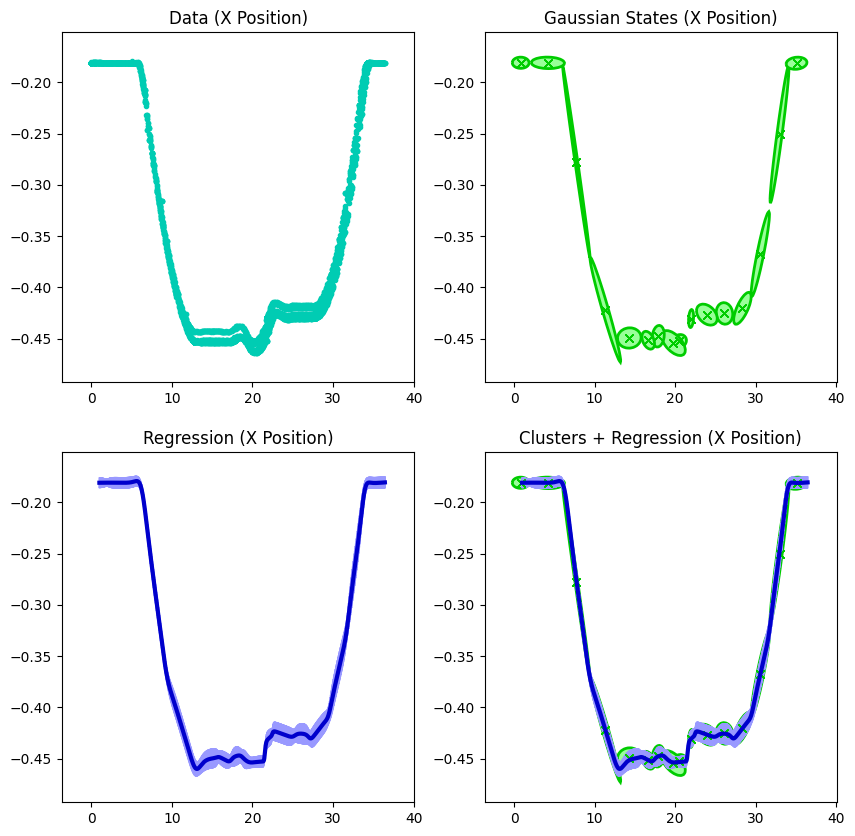


Y Position

<class 'matplotlib.axes._axes.Axes'>


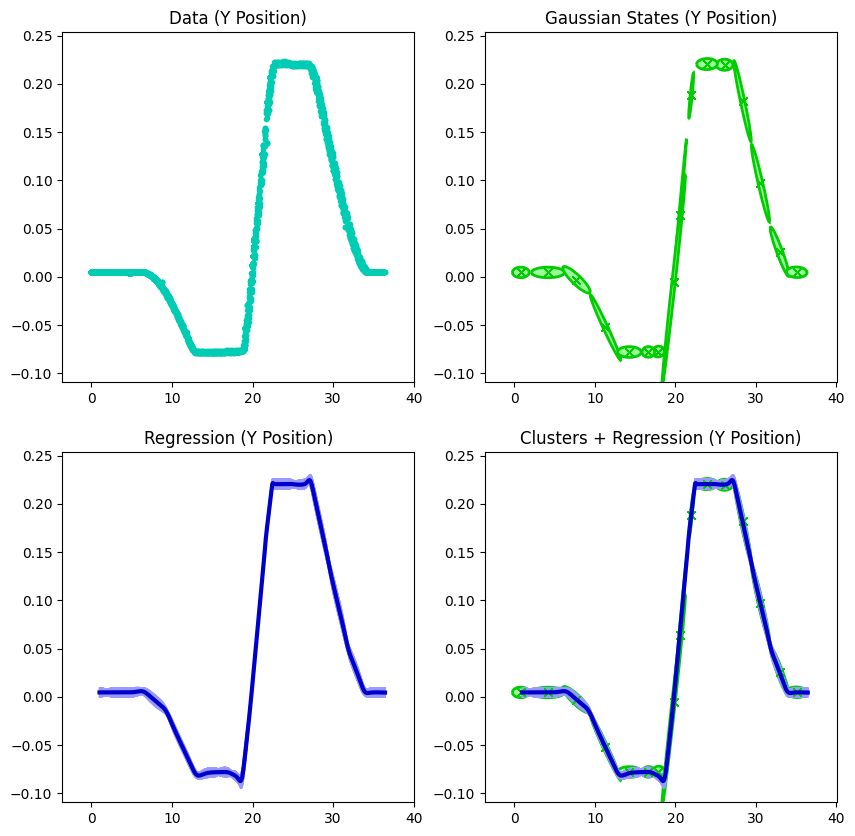


Z Position

<class 'matplotlib.axes._axes.Axes'>


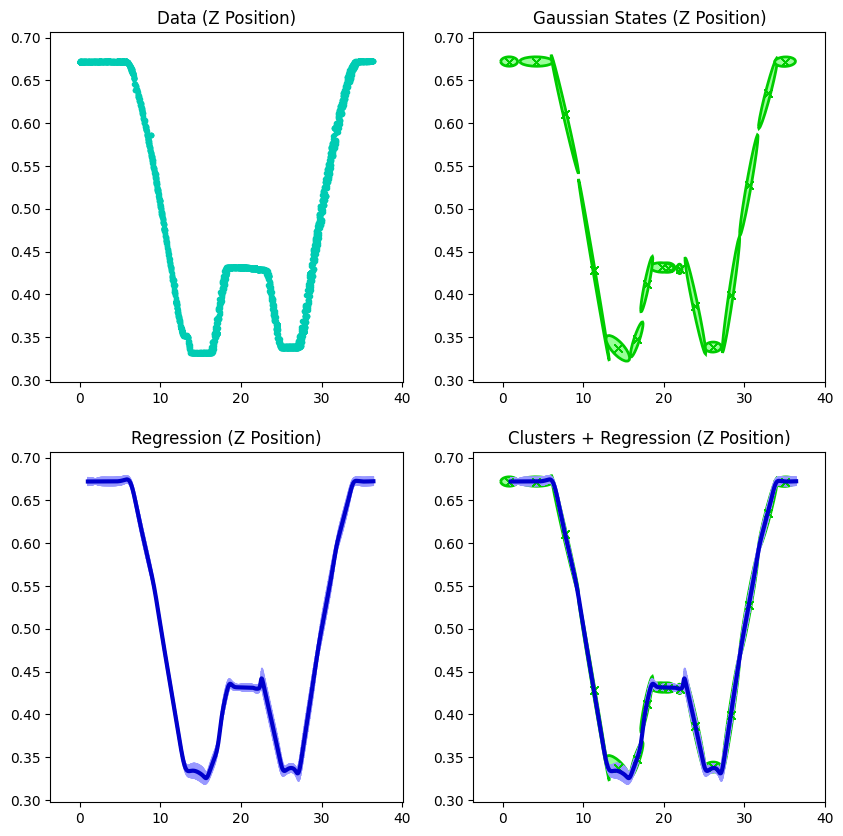


W Orientation

<class 'matplotlib.axes._axes.Axes'>


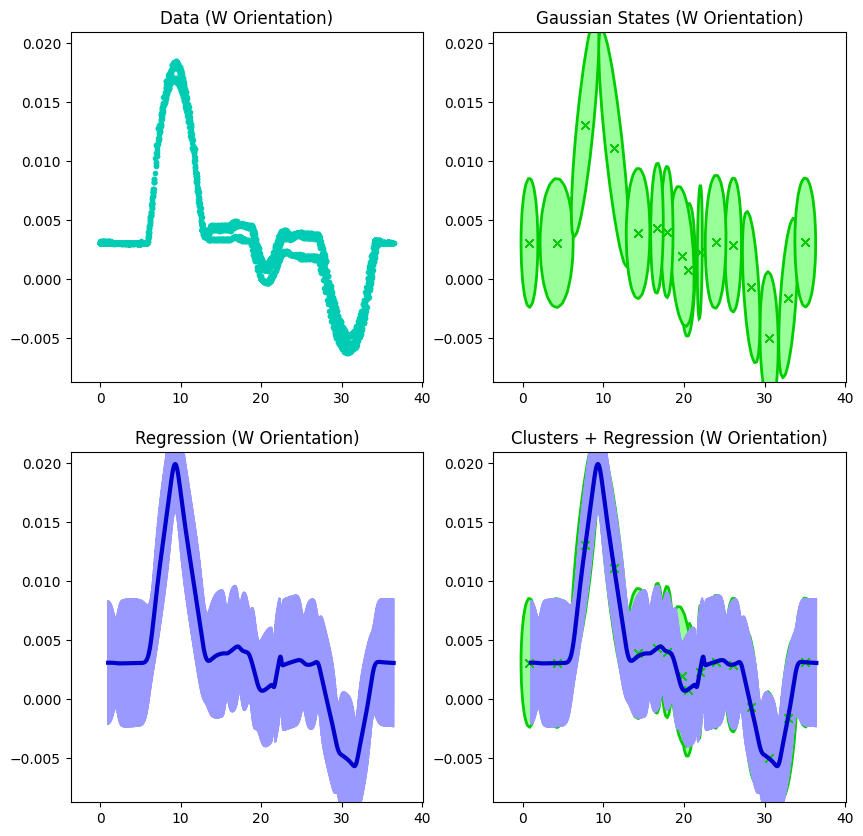


Left Finger Position

<class 'matplotlib.axes._axes.Axes'>


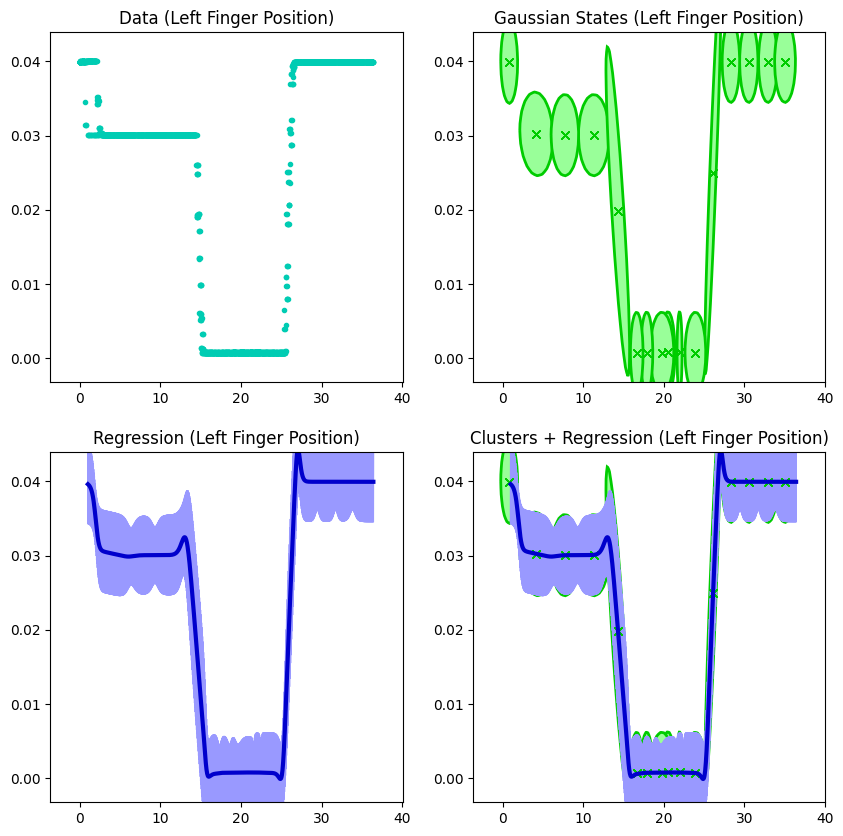


Right Finger Position

<class 'matplotlib.axes._axes.Axes'>


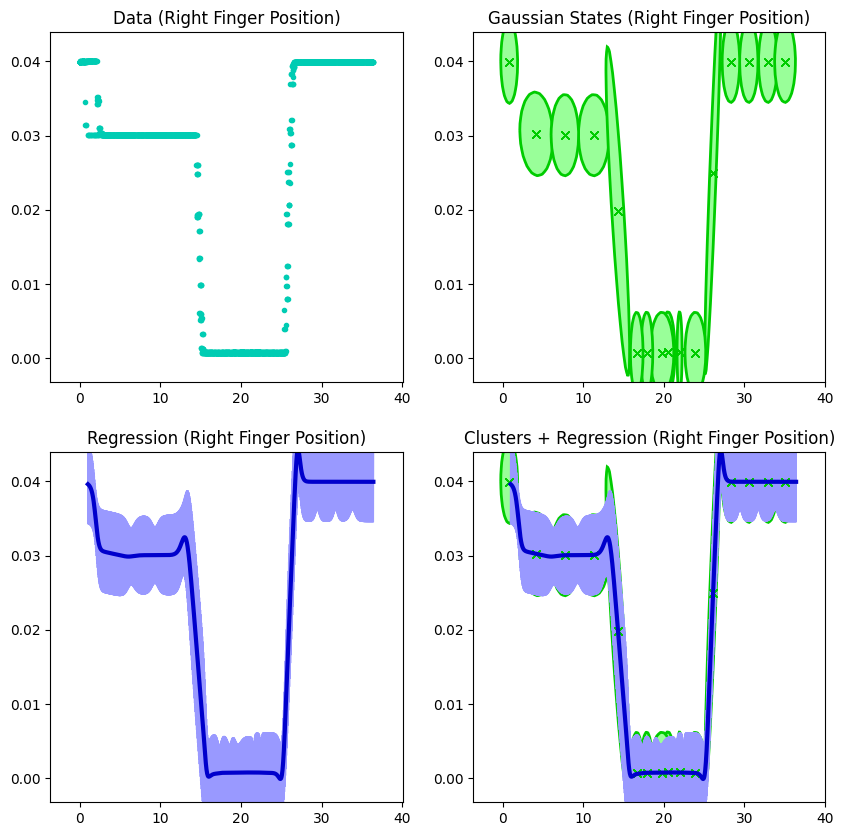

In [ ]:
predictedMatrix = gmr.getPredictedMatrix()
print(predictedMatrix)

titles = ["X Position", "Y Position", "Z Position", "W Orientation", "Left Finger Position", "Right Finger Position"]

for i in range(1,7):
  print()
  print(titles[i-1])
  print()
  fig = plt.figure(figsize=(10,10))

  ax1 = fig.add_subplot(221)
  print(type(ax1))
  plt.title(f'Data ({titles[i-1]})')
  gmr.plot(0, i, ax=ax1, plotType="Data")

  ax2 = fig.add_subplot(222)
  plt.title(f'Gaussian States ({titles[i-1]})')
  gmr.plot(0, i, ax=ax2, plotType="Clusters")

  ax3 = fig.add_subplot(223)
  plt.title(f'Regression ({titles[i-1]})')
  gmr.plot(0, i, ax=ax3, plotType="Regression")

  ax4 = fig.add_subplot(224)
  plt.title(f'Clusters + Regression ({titles[i-1]})')
  gmr.plot(0, i, ax=ax4, plotType="Clusters")
  gmr.plot(0, i, ax=ax4, plotType="Regression")
  plt.show()

In [ ]:
import pickle

# Assuming 'gmr' is your GMM_GMR object
with open('/content/drive/My Drive/ECEN524/Project 1/gmr_rot.pkl', 'rb') as file:
    gmr_rot = pickle.load(file)

[[ 1.00000000e+00  1.04193292e+00  1.08386585e+00 ...  3.63494554e+01
   3.63913883e+01  3.64333212e+01]
 [ 9.99122456e-01  9.99122056e-01  9.99121654e-01 ...  9.99095642e-01
   9.99095186e-01  9.99094729e-01]
 [-3.66519088e-02 -3.66521333e-02 -3.66523620e-02 ... -3.72037000e-02
  -3.72178663e-02 -3.72320293e-02]
 [-2.04140290e-02 -2.04175026e-02 -2.04209745e-02 ... -2.04521689e-02
  -2.04511212e-02 -2.04500712e-02]]

X Orientation

<class 'matplotlib.axes._axes.Axes'>


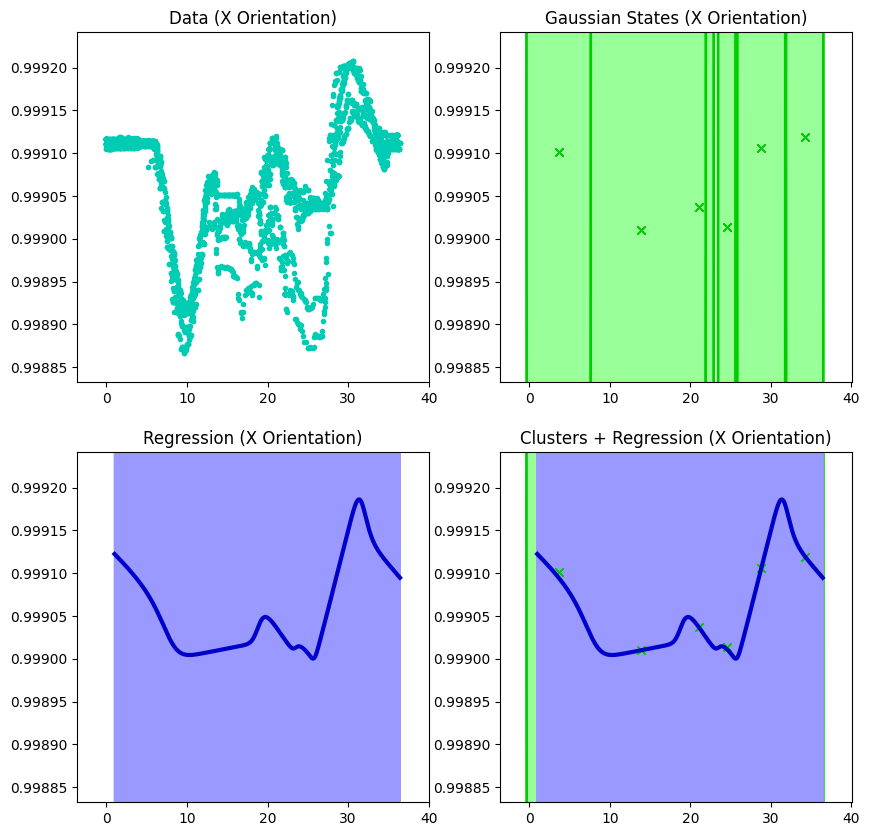


Y Orientation

<class 'matplotlib.axes._axes.Axes'>


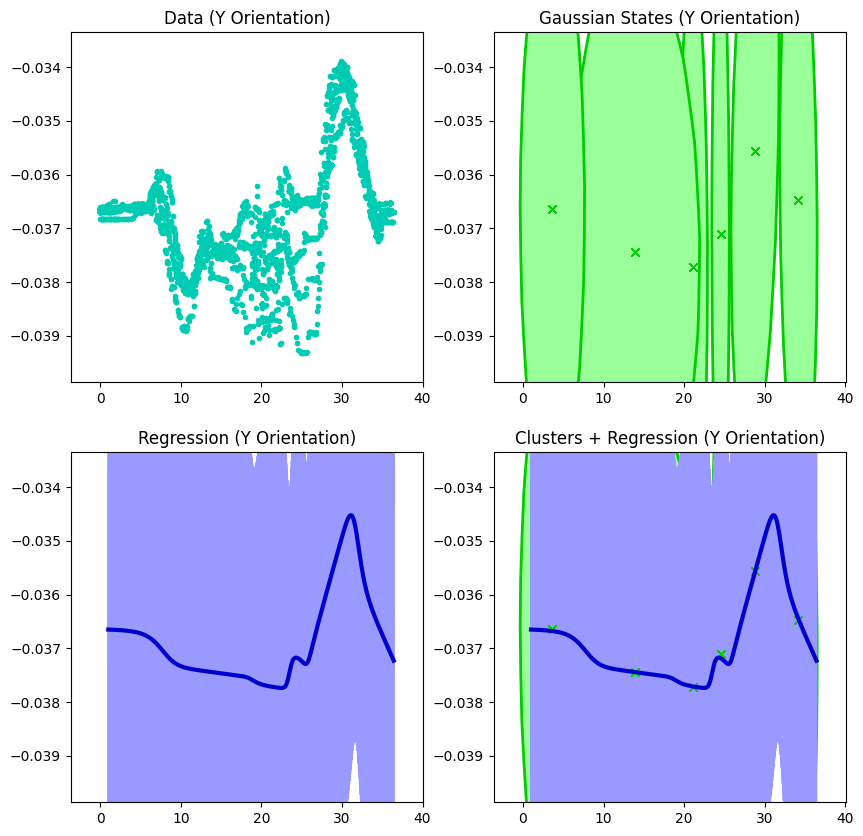


Z Orientation

<class 'matplotlib.axes._axes.Axes'>


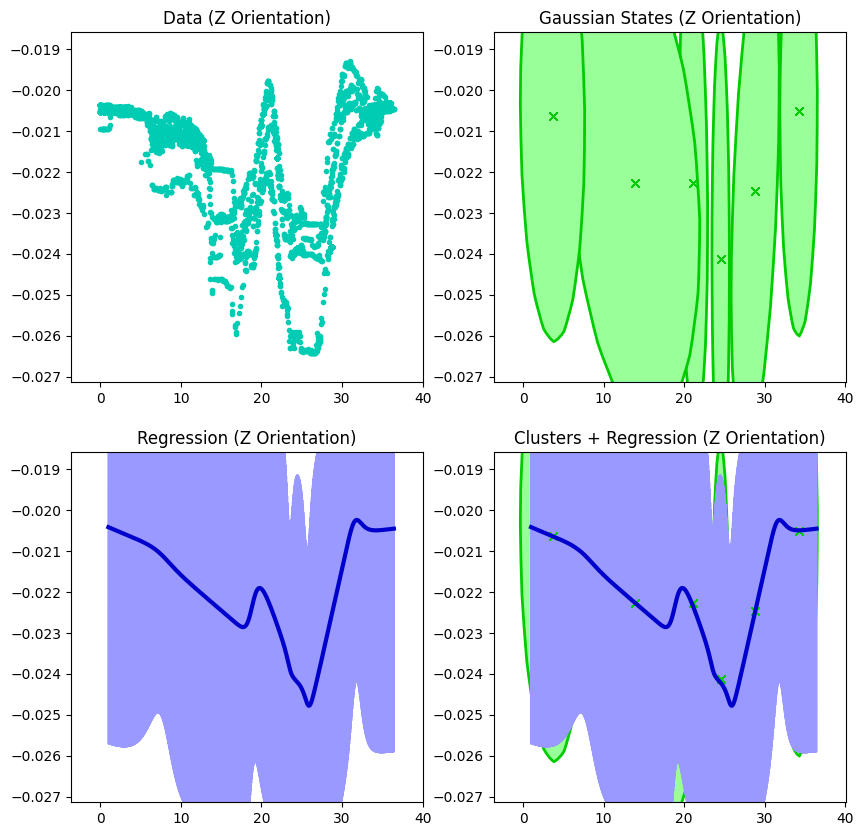

In [ ]:
predictedMatrix = gmr_rot.getPredictedMatrix()
print(predictedMatrix)

titles = ["X Orientation", "Y Orientation", "Z Orientation"]

for i in range(1,4):
  print()
  print(titles[i-1])
  print()
  fig = plt.figure(figsize=(10,10))

  ax1 = fig.add_subplot(221)
  print(type(ax1))
  plt.title(f'Data ({titles[i-1]})')
  gmr_rot.plot(0, i, ax=ax1, plotType="Data")

  ax2 = fig.add_subplot(222)
  plt.title(f'Gaussian States ({titles[i-1]})')
  gmr_rot.plot(0, i, ax=ax2, plotType="Clusters")

  ax3 = fig.add_subplot(223)
  plt.title(f'Regression ({titles[i-1]})')
  gmr_rot.plot(0, i, ax=ax3, plotType="Regression")

  ax4 = fig.add_subplot(224)
  plt.title(f'Clusters + Regression ({titles[i-1]})')
  gmr_rot.plot(0, i, ax=ax4, plotType="Clusters")
  gmr_rot.plot(0, i, ax=ax4, plotType="Regression")
  plt.show()

#Problem C
##Part 3

In [ ]:
# Assuming 'gmr' is your GMM_GMR object
with open('/content/drive/My Drive/ECEN524/Project 1/gmr_1.pkl', 'rb') as file:
    gmr_1 = pickle.load(file)

# Assuming 'gmr' is your GMM_GMR object
with open('/content/drive/My Drive/ECEN524/Project 1/gmr_2.pkl', 'rb') as file:
    gmr_2 = pickle.load(file)

# Assuming 'gmr' is your GMM_GMR object
with open('/content/drive/My Drive/ECEN524/Project 1/gmr_3.pkl', 'rb') as file:
    gmr_3 = pickle.load(file)

In [ ]:
reformed_data = np.empty((10, 846))
regular_data = np.empty((10, 846))

for i in range(10):
  temp = np.concatenate((gmr_1.getPredictedMatrix()[i], gmr_2.getPredictedMatrix()[i]))
  reformed_data[i] = np.concatenate((temp, gmr_3.getPredictedMatrix()[i]))

for i in range(10):
  if i < 4:
    regular_data[i] = gmr.getPredictedMatrix()[i]
  elif i > 3 and i < 7:
    regular_data[i] = gmr_rot.getPredictedMatrix()[i-3]
  else:
    regular_data[i] = gmr.getPredictedMatrix()[i-3]

In [ ]:
def compare_plot(index, title, xlabel, ylabel):
  fig = plt.figure(figsize=(21,7))

  ax1 = fig.add_subplot(131)
  for i in range(5):
    plt.plot(final_time[i], D[index][i], label=f'Demo {i+1}')
  plt.title(f'{title} (Original Demonstrations)')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()

  ax2 = fig.add_subplot(132)
  plt.plot(regular_data[0], regular_data[index])
  plt.title(f'{title} (GMR with Complete Trajectories)')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  ax3 = fig.add_subplot(133)
  plt.plot(regular_data[0], reformed_data[index])
  plt.title(f'{title} (GMR with Piecewise Trajectories)')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

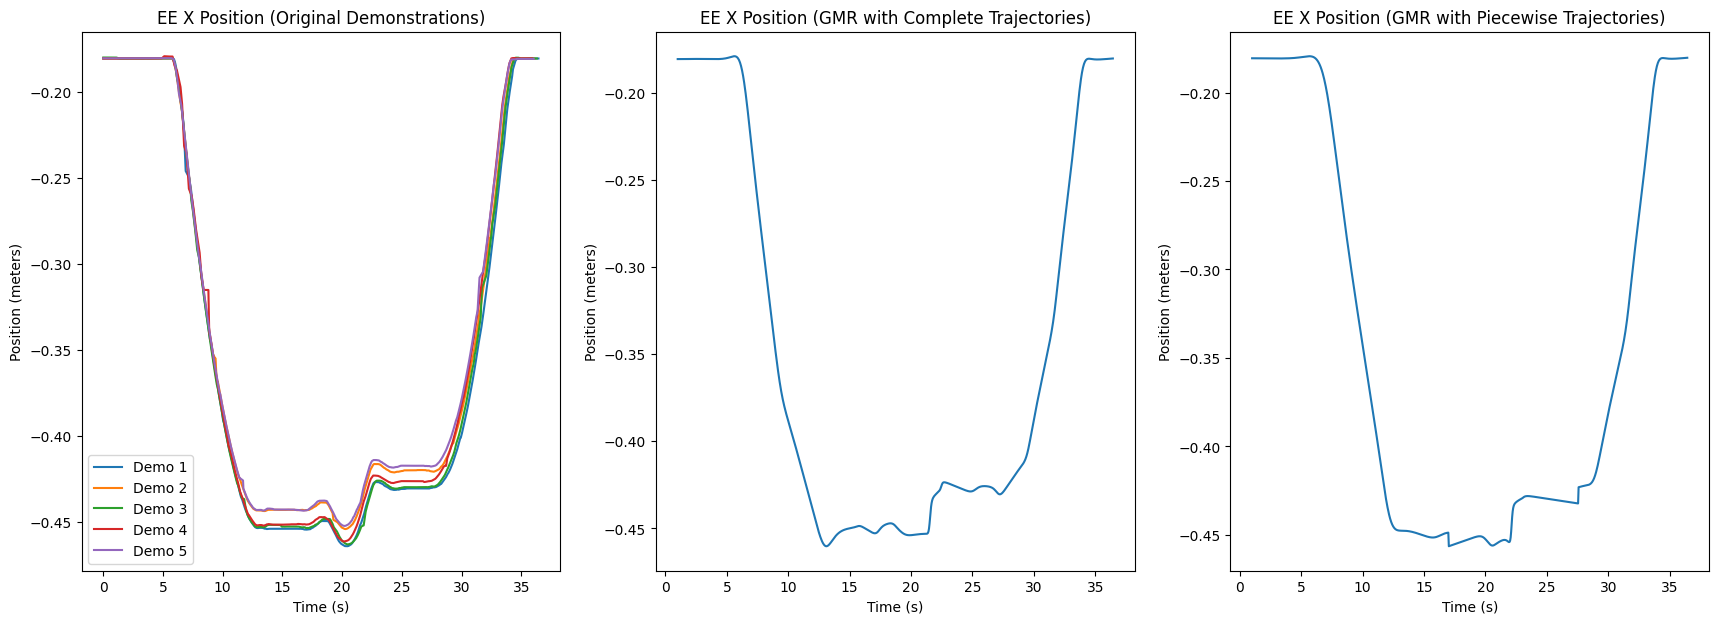

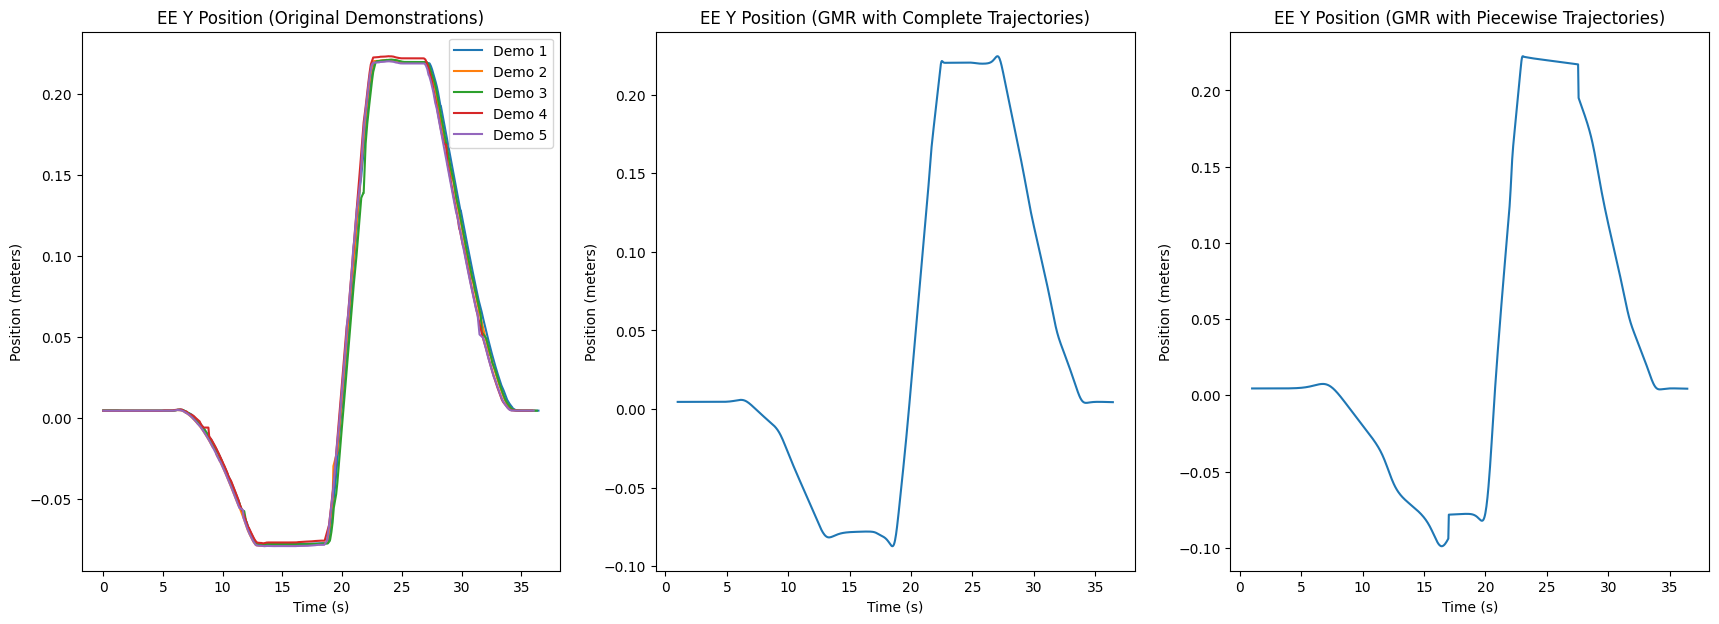

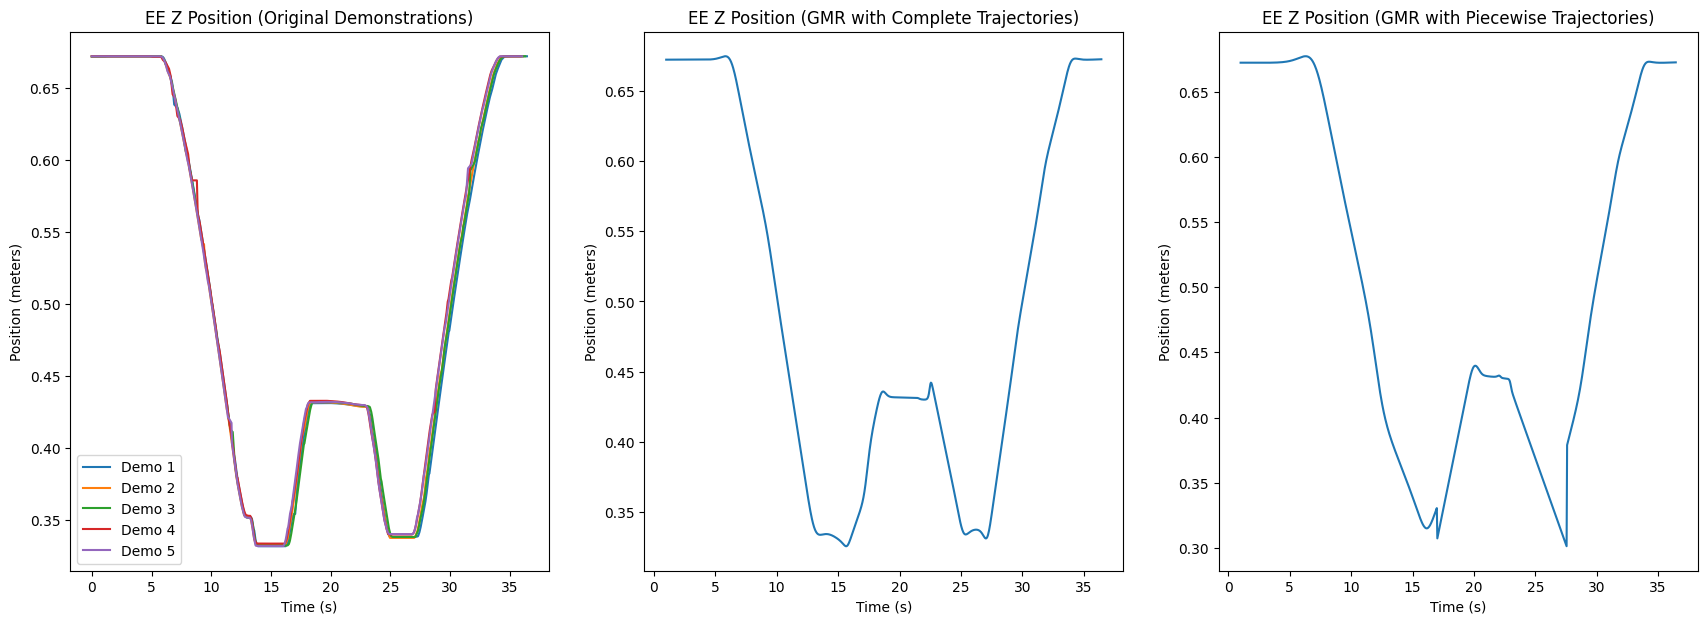

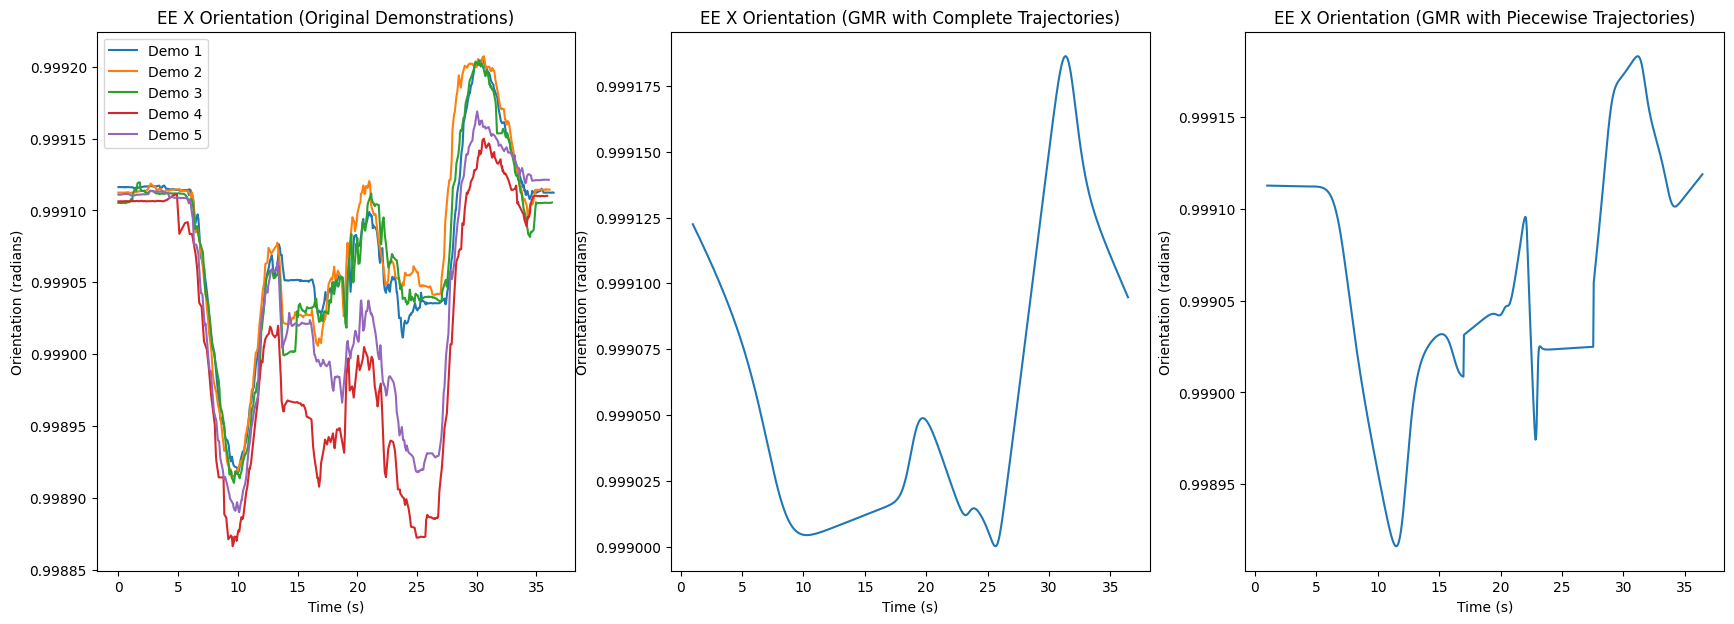

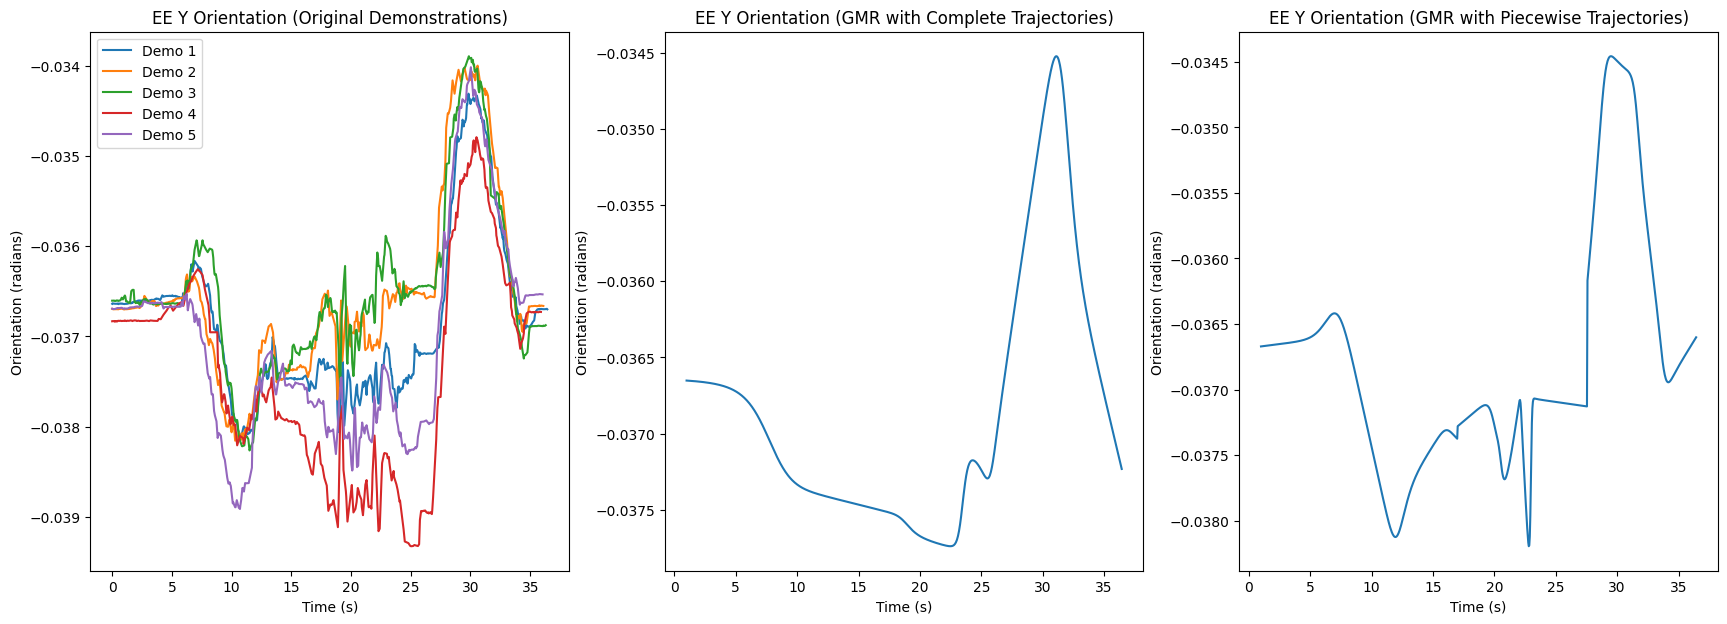

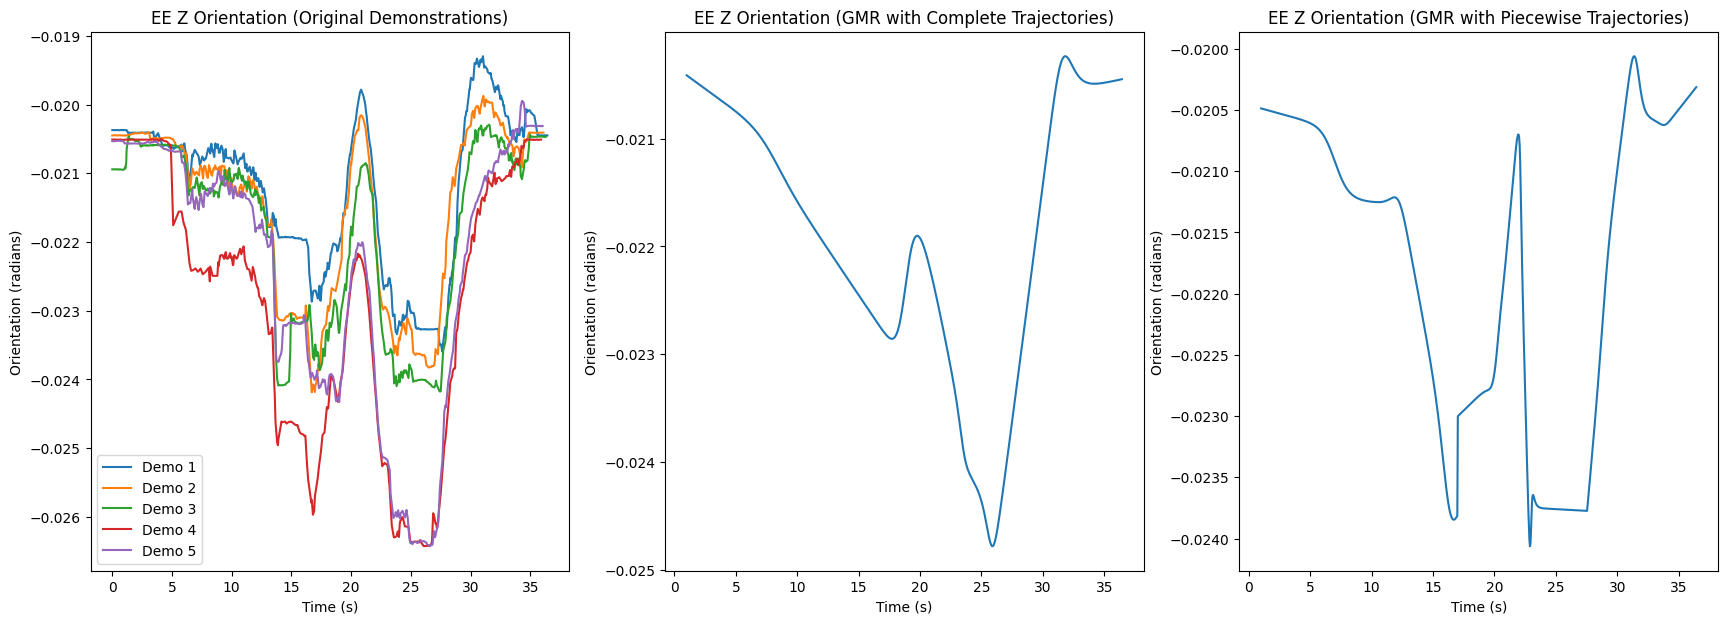

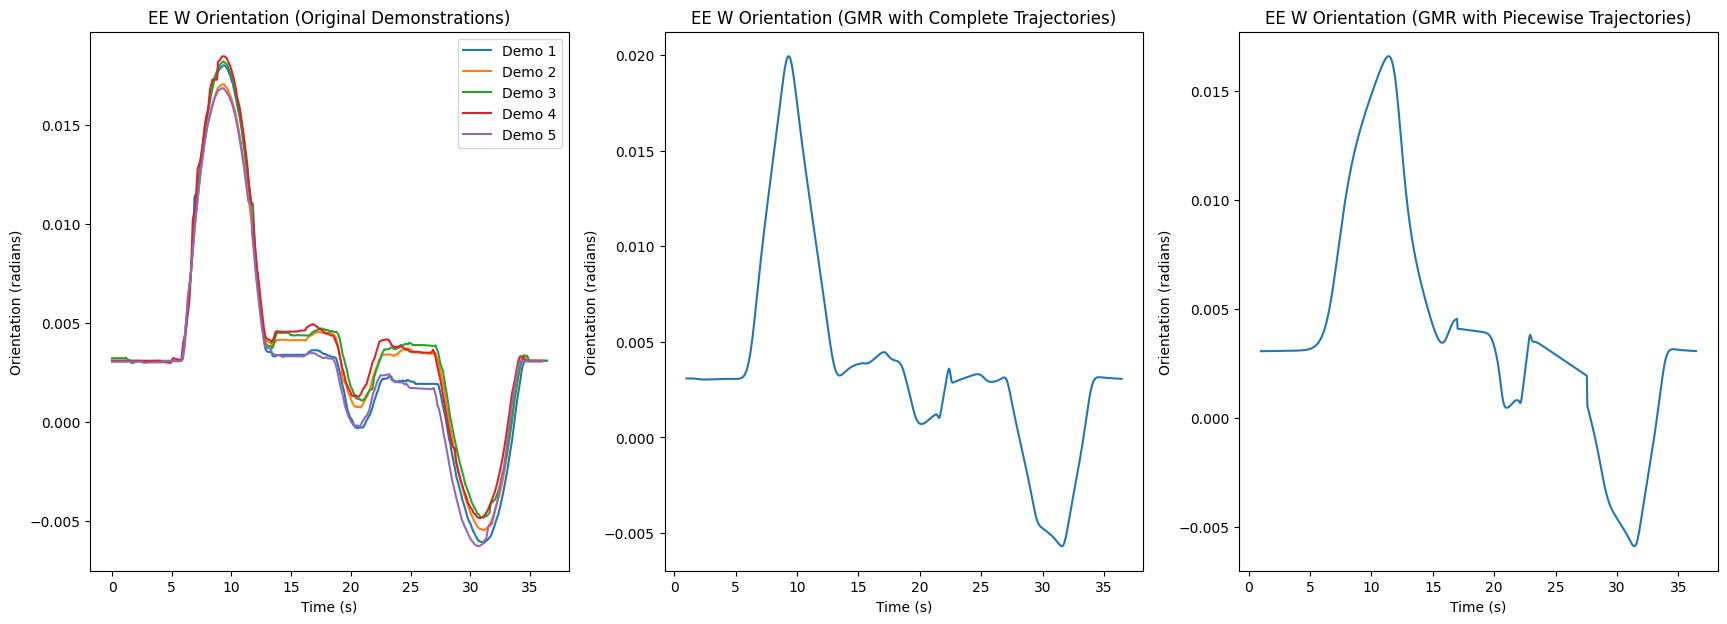

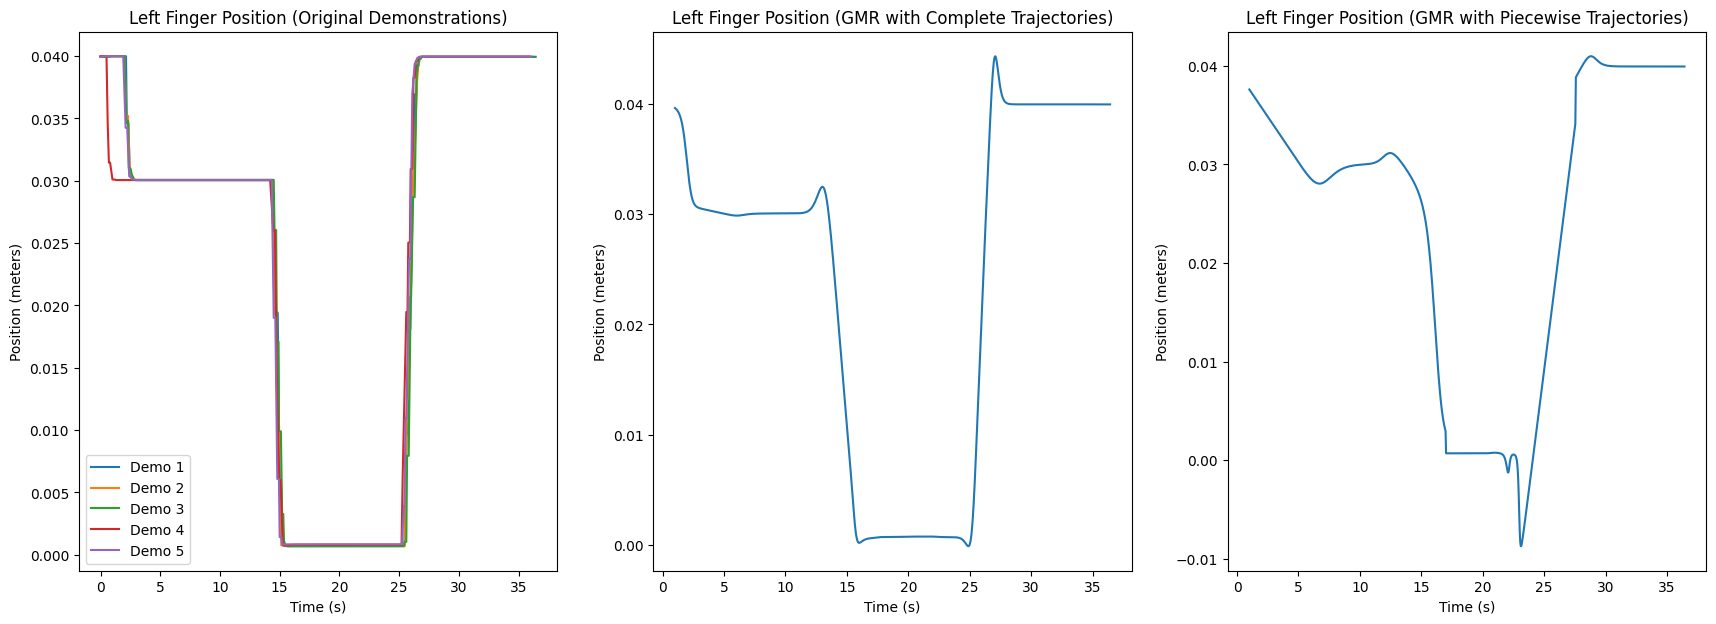

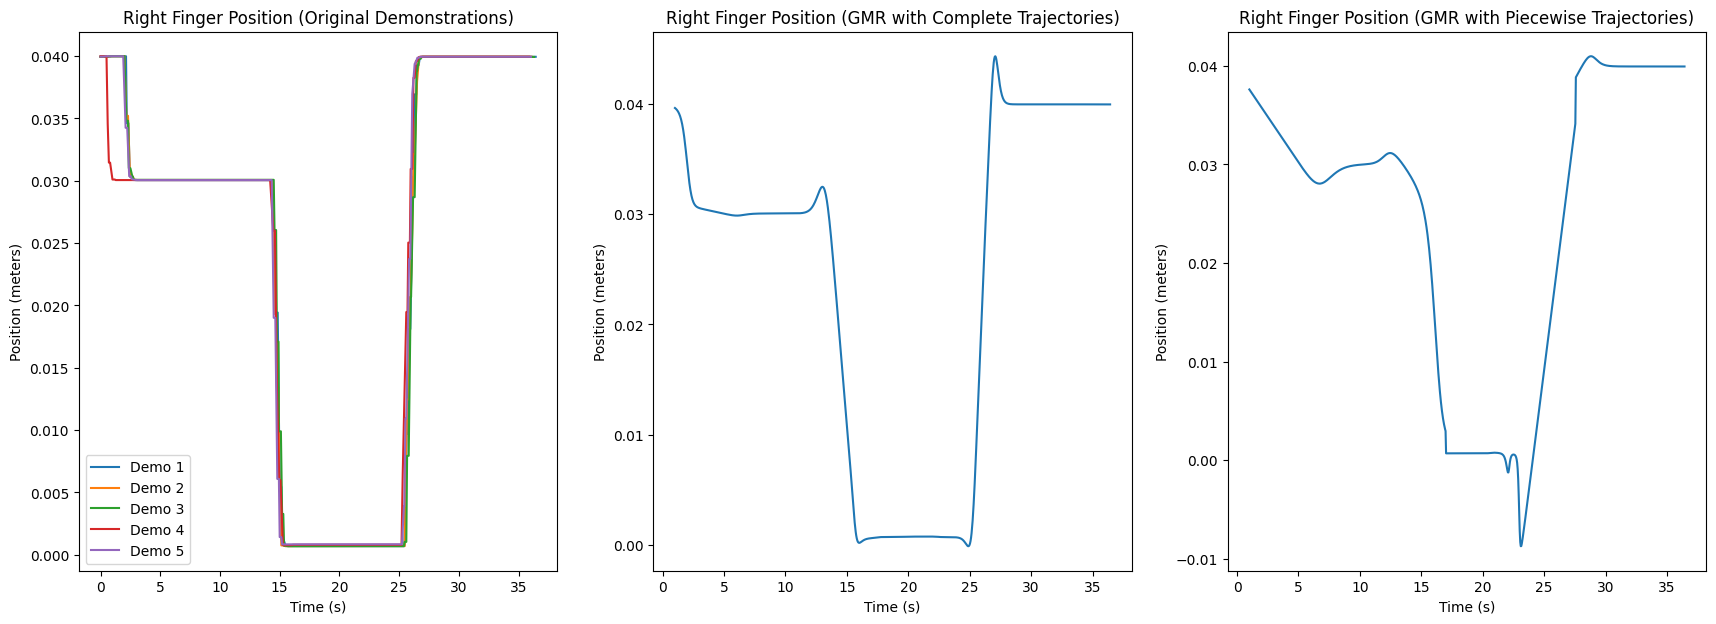

In [ ]:
titles = ["EE X Position", "EE Y Position", "EE Z Position", "EE X Orientation", "EE Y Orientation", "EE Z Orientation", "EE W Orientation", "Left Finger Position", "Right Finger Position"]
ylabels = ['Position (meters)', 'Position (meters)', 'Position (meters)', 'Orientation (radians)', 'Orientation (radians)', 'Orientation (radians)', 'Orientation (radians)', 'Position (meters)', 'Position (meters)']

for i in range(1,10):
  compare_plot(i, titles[i-1], "Time (s)", ylabels[i-1])

#Problem D

In [ ]:
!pip install movement_primitives[all]

In [ ]:
%cd /content/
!git clone https://github.com/dfki-ric/movement_primitives.git
%cd /content/movement_primitives/
!python3 /content/movement_primitives/setup.py install

/content
Cloning into 'movement_primitives'...
remote: Enumerating objects: 4397, done.
remote: Counting objects: 100% (949/949), done.
remote: Compressing objects: 100% (327/327), done.
remote: Total 4397 (delta 598), reused 892 (delta 575), pack-reused 3448 (from 1)
Receiving objects: 100% (4397/4397), 15.59 MiB | 16.72 MiB/s, done.
Resolving deltas: 100% (2950/2950), done.
/content/movement_primitives
Compiling movement_primitives/dmp_fast.pyx because it changed.
[1/1] Cythonizing movement_primitives/dmp_fast.pyx
/usr/local/lib/python3.11/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/movement_primitives/movement_primitives/dmp_fast.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/dist.py:261: UserWarning: Unknown distribution option: 'compiler_directives'
  warnings.warn(msg)
/us

In [ ]:
!python3 setup.py build_ext --inplace

/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/dist.py:261: UserWarning: Unknown distribution option: 'compiler_directives'
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/dist.py:261: UserWarning: Unknown distribution option: 'extra_compile_args'
  warnings.warn(msg)
running build_ext
copying build/lib.linux-x86_64-cpython-311/movement_primitives/dmp_fast.cpython-311-x86_64-linux-gnu.so -> movement_primitives


In [ ]:
!pip install -r requirements.txt

DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/movement_primitives-0.9.0-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
"""
======================
Spatial Scaling of DMP
======================

The standard DMP definition of Ijspeert et al. (2013) does not scale well,
when the original demonstration has both the start and the goal state close
together: small perturbation in the start and/or goal state often result in
large accelerations. To fix this issue, our implementation of the DMP does
not scale the forcing term by $(g - y_0)$. We also adopted the modification of

P. Pastor, H. Hoffmann, T. Asfour, S. Schaal:
Learning and Generalization of Motor Skills by Learning from Demonstration

Note that this has to be activated explicitly by setting smooth scaling in the
constructor of the DMP. This behavior is implemented for all types of DMPs.
This example demonstrates the behavior of this DMP implementation in these
cases.
"""
import numpy as np
import matplotlib.pyplot as plt
from movement_primitives.dmp import DMP


T = gmr_1.getPredictedMatrix()[0]
x = gmr_1.getPredictedMatrix()[1]
y = gmr_1.getPredictedMatrix()[2]
z = gmr_1.getPredictedMatrix()[3]
Y = np.column_stack((x, y, z))
start = Y[0]
goal = Y[-1]
new_start = np.array([-0.3, 0.1, 0.5])
new_pick = np.array([-0.6, 0.0, 0.4])
Y_start_shifted = Y - start[np.newaxis] + new_start[np.newaxis]
Y_goal_shifted = Y - goal[np.newaxis] + new_pick[np.newaxis]

dmp = DMP(n_dims=len(start), execution_time=T[-1]-T[0], dt=T[1]-T[0], n_weights_per_dim=10,
          smooth_scaling=True)
dmp.imitate(T, Y)
dmp.configure(start_y=new_start, goal_y=new_pick)
_, Y_dmp_1 = dmp.open_loop()

T = gmr_2.getPredictedMatrix()[0]
x = gmr_2.getPredictedMatrix()[1]
y = gmr_2.getPredictedMatrix()[2]
z = gmr_2.getPredictedMatrix()[3]
Y = np.column_stack((x, y, z))
start = Y[0]
goal = Y[-1]
new_pick = np.array([-0.6, 0.0, 0.4])
new_place = np.array([-0.5, 0.15, 0.45])
Y_start_shifted = Y - start[np.newaxis] + new_pick[np.newaxis]
Y_goal_shifted = Y - goal[np.newaxis] + new_place[np.newaxis]

dmp = DMP(n_dims=len(start), execution_time=T[-1]-T[0], dt=T[1]-T[0], n_weights_per_dim=2,
          smooth_scaling=True)
dmp.imitate(T, Y)
dmp.configure(start_y=new_pick, goal_y=new_place)
_, Y_dmp_2 = dmp.open_loop()

T = gmr_3.getPredictedMatrix()[0]
x = gmr_3.getPredictedMatrix()[1]
y = gmr_3.getPredictedMatrix()[2]
z = gmr_3.getPredictedMatrix()[3]
Y = np.column_stack((x, y, z))
start = Y[0]
goal = Y[-1]
new_place = np.array([-0.5, 0.15, 0.45])
new_end = np.array([-0.2, 0.05, 0.6])
Y_start_shifted = Y - start[np.newaxis] + new_place[np.newaxis]
Y_goal_shifted = Y - goal[np.newaxis] + new_end[np.newaxis]

dmp = DMP(n_dims=len(start), execution_time=T[-1]-T[0], dt=T[1]-T[0], n_weights_per_dim=40,
          smooth_scaling=True)
dmp.imitate(T, Y)
dmp.configure(start_y=new_place, goal_y=new_end)
_, Y_dmp_3 = dmp.open_loop()

In [ ]:
reformed_dmp = np.zeros((3,846))

for i in range(3):
  temp = np.concatenate((Y_dmp_1[:,i], Y_dmp_2[:,i]))
  reformed_dmp[i] = np.concatenate((temp, Y_dmp_3[0:Y_dmp_3.shape[0]-1,i]))

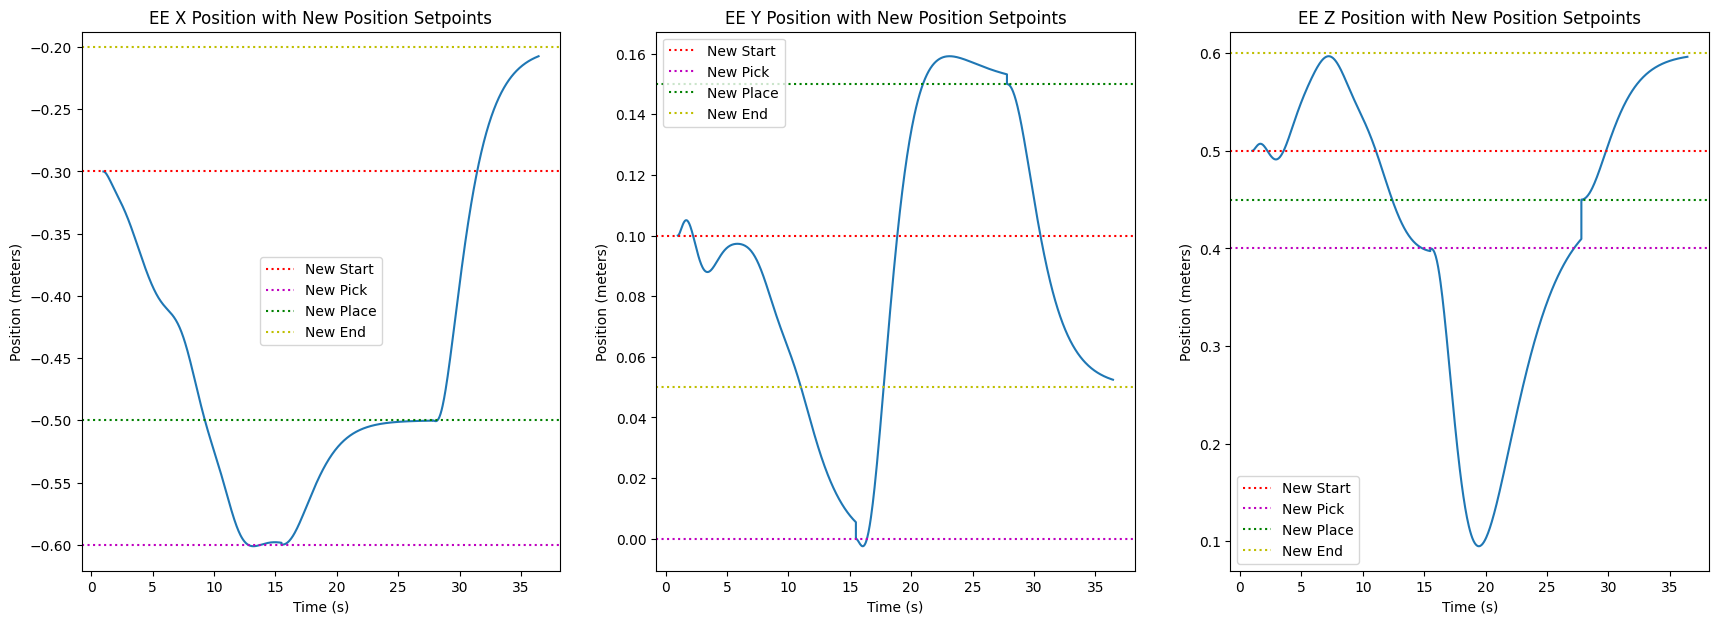

In [ ]:
fig = plt.figure(figsize=(21,7))
titles = ["EE X Position with New Position Setpoints", "EE Y Position with New Position Setpoints", "EE Z Position with New Position Setpoints"]

for i in range(3):
  ax = fig.add_subplot(131+i)
  plt.plot(reformed_data[0], reformed_dmp[i])
  plt.axhline(y=new_start[i], color='r', linestyle=':', label="New Start")
  plt.axhline(y=new_pick[i], color='m', linestyle=':', label="New Pick")
  plt.axhline(y=new_place[i], color='g', linestyle=':', label="New Place")
  plt.axhline(y=new_end[i], color='y', linestyle=':', label="New End")
  plt.title(titles[i])
  plt.xlabel("Time (s)")
  plt.ylabel("Position (meters)")
  plt.legend()

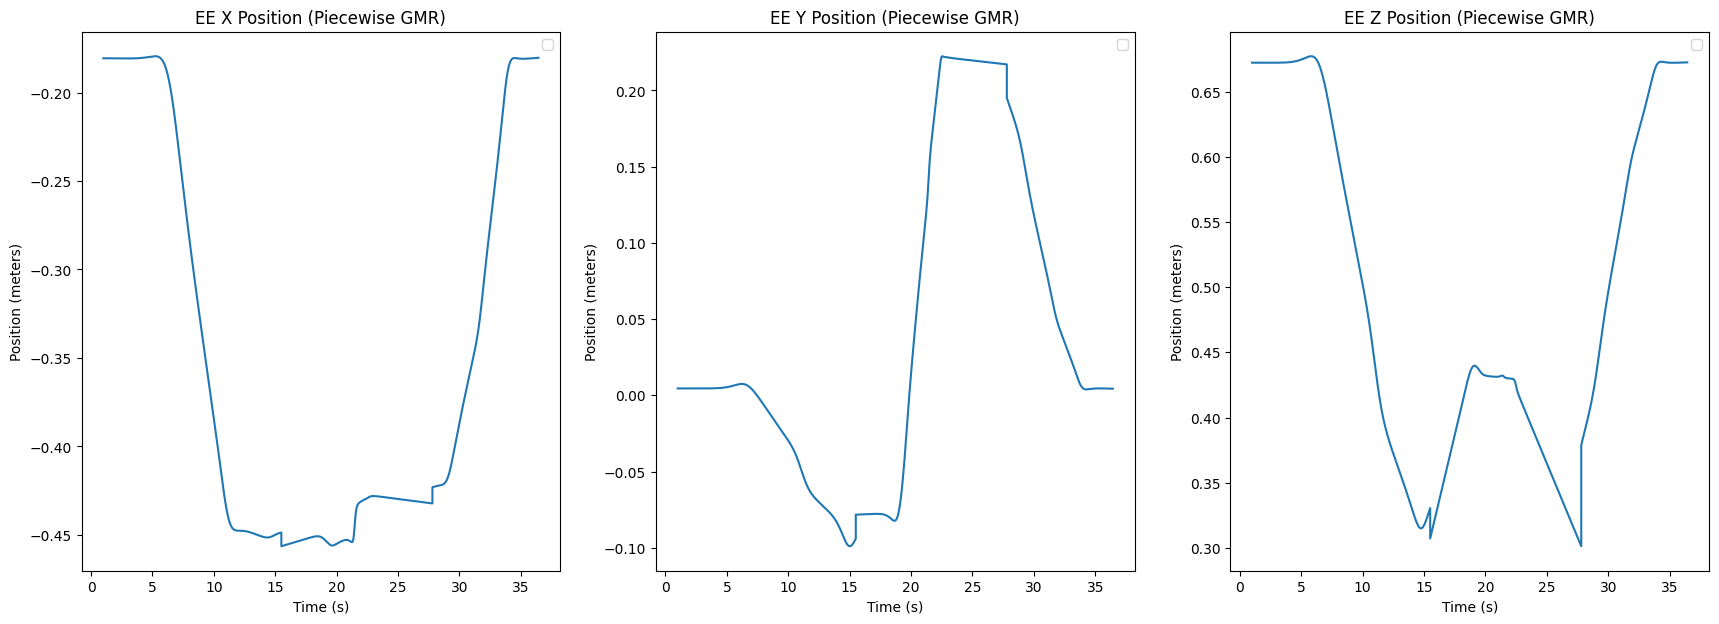

In [ ]:
fig = plt.figure(figsize=(21,7))
titles = ["EE X Position (Piecewise GMR)", "EE Y Position (Piecewise GMR)", "EE Z Position (Piecewise GMR)"]

for i in range(3):
  ax = fig.add_subplot(131+i)
  plt.plot(reformed_data[0], reformed_data[i+1])
  plt.title(titles[i])
  plt.xlabel("Time (s)")
  plt.ylabel("Position (meters)")
  plt.legend()


DMP as Potential Field

A Dynamical Movement Primitive defines a potential field that superimposes
several components: transformation system (goal-directed movement), forcing
term (learned shape), and coupling terms (e.g., obstacle avoidance).

[-0.5        -0.49991515]
[-0.44267869 -0.44259384]


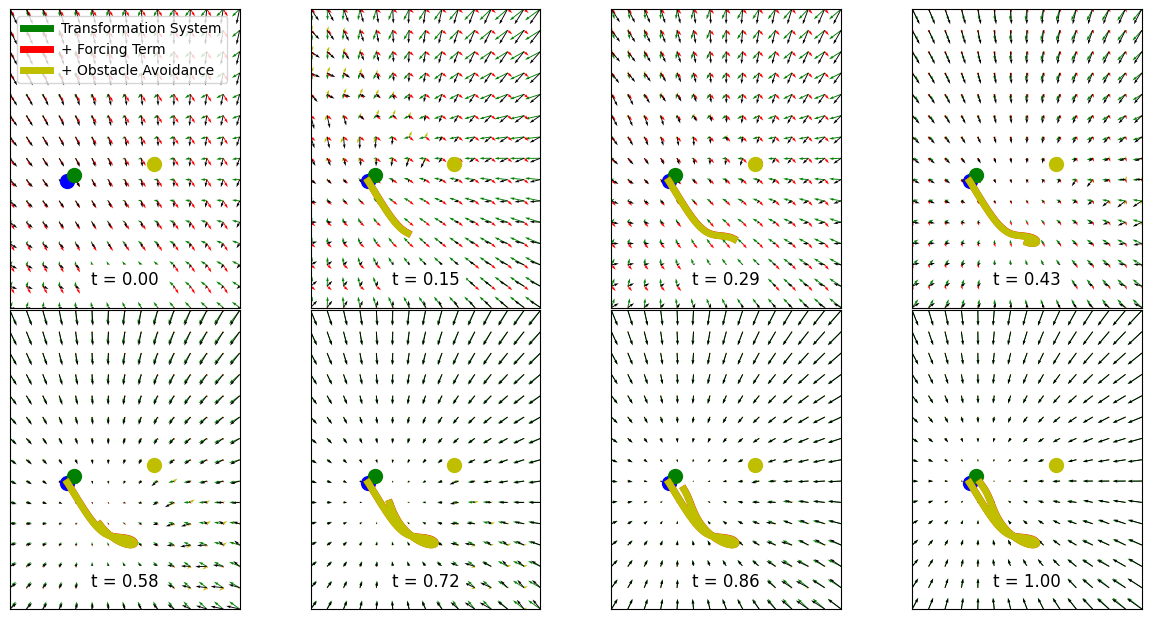

In [ ]:
"""
======================
DMP as Potential Field
======================

A Dynamical Movement Primitive defines a potential field that superimposes
several components: transformation system (goal-directed movement), forcing
term (learned shape), and coupling terms (e.g., obstacle avoidance).
"""
print(__doc__)


import numpy as np
import matplotlib.pyplot as plt
from movement_primitives.dmp import DMP, CouplingTermObstacleAvoidance2D
from movement_primitives.dmp_potential_field import plot_potential_field_2d


start_y = np.array([Y_start_shifted[0][0], Y_start_shifted[1][0]], dtype=float)
goal_y = np.array([Y_goal_shifted[0][0], Y_goal_shifted[1][0]], dtype=float)
obstacle = np.array([0.25, -0.35])
random_state = np.random.RandomState(42)
print(start_y)
print(goal_y)

dmp = DMP(n_dims=2, n_weights_per_dim=10, dt=0.01, execution_time=1.0)
dmp.configure(start_y=start_y, goal_y=goal_y)

dmp_ft = DMP(n_dims=2, n_weights_per_dim=10, dt=0.01, execution_time=1.0)
dmp_ft.forcing_term.weights_[:, :] = random_state.randn(
    *dmp_ft.forcing_term.weights_.shape) * 500.0
dmp_ft.configure(start_y=start_y, goal_y=goal_y)

dmp_ct = DMP(n_dims=2, n_weights_per_dim=10, dt=0.01, execution_time=1.0)
dmp_ct.forcing_term.weights_[:, :] = dmp_ft.forcing_term.weights_[:, :]
dmp_ct.configure(start_y=start_y, goal_y=goal_y)
coupling_term = CouplingTermObstacleAvoidance2D(obstacle)
n_rows, n_cols = 2, 4
n_subplots = n_rows * n_cols
x_range = -1, 1
y_range = -1.6, 1

position = np.copy(start_y)
velocity = np.zeros_like(start_y)

position_ft = np.copy(start_y)
velocity_ft = np.zeros_like(start_y)

position_ct = np.copy(start_y)
velocity_ct = np.zeros_like(start_y)

plt.figure(figsize=(12, 6))
positions = [position]
positions_ft = [position_ft]
positions_ct = [position_ct]
for i in range(n_subplots):
    ax = plt.subplot(n_rows, n_cols, i + 1, aspect="equal")
    ax.set_title(f"t = {dmp.t:.02f}", backgroundcolor="#ffffffff", y=0.05)

    plot_potential_field_2d(
        ax, dmp_ct, x_range=x_range, y_range=y_range, n_ticks=15,
        obstacle=obstacle)
    plt.plot(start_y[0], start_y[1], "o", color="b", markersize=10)
    plt.plot(goal_y[0], goal_y[1], "o", color="g", markersize=10)
    plt.plot(obstacle[0], obstacle[1], "o", color="y", markersize=10)

    path = np.array(positions)
    plt.plot(path[:, 0], path[:, 1], lw=5, color="g", label="Transformation System")
    path_ft = np.array(positions_ft)
    plt.plot(path_ft[:, 0], path_ft[:, 1], lw=5, color="r", label="+ Forcing Term")
    path_ct = np.array(positions_ct)
    plt.plot(path_ct[:, 0], path_ct[:, 1], lw=5, color="y", label="+ Obstacle Avoidance")

    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    plt.setp(ax, xticks=(), yticks=())
    if i == 0:
        ax.legend(loc="upper left")

    if i == n_subplots - 1:
        break

    while dmp.t <= dmp.execution_time_ * (1 + i) / (n_subplots - 1):
        position, velocity = dmp.step(position, velocity)
        positions.append(position)
        position_ft, velocity_ft = dmp_ft.step(position_ft, velocity_ft)
        positions_ft.append(position_ft)
        position_ct, velocity_ct = dmp_ct.step(
            position_ct, velocity_ct, coupling_term=coupling_term)
        positions_ct.append(position_ct)
plt.subplots_adjust(
    left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.01, hspace=0.01)
plt.show()